# Problem Statement

To find how rating is influenced by different attributes such as length of the movie, genre of the movie, certificate type of the movie, gross collections of the movie, number of votes polled to rate movie between the years 2011 and 2019. Also to find the top actors, top directors between the years 2011 to 2019. Also to find what genre is preferred by filmmakers between these years.

In [1]:
# Importing all the essential libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import re
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Define a list of movies numbers which are at start of the page
li=np.arange(1,5001,50)

Extracting data of movies from 2010 to 2019 sorted gross collections in descending order. Total of 5000 movies were extracted

In [58]:
# Create an empty list of variables which would be scrapped
name=[]
year=[]
rating=[]
length=[]
votes=[]
certificate=[]
metascore=[]
genre=[]
hero=[]
director=[]
gross=[]

for i in li:
    url='https://www.imdb.com/search/title/?title_type=feature,tv_movie,tv_series,short&release_date=2010-01-01,2019-12-31&sort=boxoffice_gross_us,desc&start={}&ref_=adv_nxt'.format(i)
    page=requests.get(url)
    content=page.text
    soup=BeautifulSoup(content)
    parent_div=soup.find_all('div',{'class':'lister-item-content'})
    
    
    for j in parent_div:
        
        name.append(j.h3.a.text)
        
        if j.h3.span.text:
            year.append(j.h3.span.text)
        else:
            year.append("NA")
      
        if j.strong:
            rating.append(j.strong.text)
        else:
            rating.append("NA")
       
        if j.find_all('span',{'name':'nv'}):
            votes.append(j.find_all('span',{'name':'nv'})[0]["data-value"])
        else:
            votes.append("NA")
        
        if j.p.find('span',{'class':'genre'}):
            genre.append(j.p.find('span',{'class':'genre'}).text)
        else:
            genre.append("NA")
        
        if j.p.span:
            certificate.append(j.p.span.text)
        else:
            certificate.append("NA")
            
        if j.p.find("span",{'class':'run-time'}):
            length.append(j.p.find('span',{'class':'runtime'}).text)
        else:
            length.append("NA")
            
        
        if j.find('div', class_ = 'ratings-metascore') is not None: 
            metascore.append(j.find('div', class_ = 'ratings-metascore').span.text)
        else:
            metascore.append("NA")
            
            
        if j.find_all('p')[2].text.find("Director")>0:
            director.append(j.find_all('p')[2].text[j.find_all('p')[2].text.find("Director"):j.find_all('p')[2].text.find("|")])
        else:
            director.append("NA")
       
    
        if j.find_all('p')[2].text.find("Stars")>0:
            director.append(j.find_all('p')[2].text[j.find_all('p')[2].text.find("Stars"):])
        else:
            director.append("NA")
                
                
        if len(j.find_all('span',{'name':'nv'}))==2:
            gross.append(j.find_all('span',{'name':'nv'})[1]["data-value"])
        else:
            gross.append("NA")

In [ ]:
# Create a dataset to store raw data and name it as raw
raw=pd.DataFrame(list(zip(name, year, rating, length, votes, certificate, metascore, genre, hero, director, gross)), columns=["Name", "Year", "Rating", "Length","Votes","Certificate","Metascore","Genre","Hero","Director","Gross"])

In [172]:
raw.head()

,Name,Year,Rating,Length,Votes,Certificate,Metascore,Genre,Hero,Director,Gross
0,Star Wars: Episode VII - The Force Awakens,(2015),7.9,138 min,868933,U,80,"\nAction, Adventure, Sci-Fi","Stars:\nDaisy Ridley, \nJohn Boyega, \nOscar I...",Director:\nJ.J. Abrams\n,"936,662,225"
1,Avengers: Endgame,(2019),8.4,181 min,860645,UA,78,"\nAction, Adventure, Drama","Stars:\nRobert Downey Jr., \nChris Evans, \nMa...","Directors:\nAnthony Russo, \nJoe Russo\n","858,373,000"
2,Black Panther,(2018),7.3,134 min,642941,UA,88,"\nAction, Adventure, Sci-Fi","Stars:\nChadwick Boseman, \nMichael B. Jordan,...",Director:\nRyan Coogler\n,"700,059,566"
3,Avengers: Infinity War,(2018),8.4,149 min,868233,UA,68,"\nAction, Adventure, Sci-Fi","Stars:\nRobert Downey Jr., \nChris Hemsworth, ...","Directors:\nAnthony Russo, \nJoe Russo\n","678,815,482"
4,Jurassic World,(2015),7.0,124 min,585609,UA,59,"\nAction, Adventure, Sci-Fi","Stars:\nChris Pratt, \nBryce Dallas Howard, \n...",Director:\nColin Trevorrow\n,"652,270,625"


In [180]:
#raw.to_csv("Raw_2011-2019.csv", index=False)

# Cleaning text

### Extracting only required number from entry and converting it into integer datatype for variables "Year", "Length", "Gross"

In [18]:
def integer(x):
    if x=="NA":
        return None
    else:
        num=''.join([i for i in x if i.isdigit()])
        return int(num)

In [177]:
raw["Year"]=raw["Year"].apply(lambda x:integer(x))

In [178]:
raw["Length"]=raw["Length"].apply(lambda x: integer(x))

In [179]:
raw["Gross"]=raw["Gross"].apply(lambda x: integer(x))

In [181]:
raw.dtypes

Name            object
Year             int64
Rating          object
Length         float64
Votes           object
Certificate     object
Metascore       object
Genre           object
Hero            object
Director        object
Gross          float64
dtype: object

In [4]:
raw.head()

,Name,Year,Rating,Length,Votes,Certificate,Metascore,Genre,Hero,Director,Gross
0,Star Wars: Episode VII - The Force Awakens,2015,7.9,138.0,868933,U,80.0,"\nAction, Adventure, Sci-Fi","Stars:\nDaisy Ridley, \nJohn Boyega, \nOscar I...",Director:\nJ.J. Abrams\n,936662225.0
1,Avengers: Endgame,2019,8.4,181.0,860645,UA,78.0,"\nAction, Adventure, Drama","Stars:\nRobert Downey Jr., \nChris Evans, \nMa...","Directors:\nAnthony Russo, \nJoe Russo\n",858373000.0
2,Black Panther,2018,7.3,134.0,642941,UA,88.0,"\nAction, Adventure, Sci-Fi","Stars:\nChadwick Boseman, \nMichael B. Jordan,...",Director:\nRyan Coogler\n,700059566.0
3,Avengers: Infinity War,2018,8.4,149.0,868233,UA,68.0,"\nAction, Adventure, Sci-Fi","Stars:\nRobert Downey Jr., \nChris Hemsworth, ...","Directors:\nAnthony Russo, \nJoe Russo\n",678815482.0
4,Jurassic World,2015,7.0,124.0,585609,UA,59.0,"\nAction, Adventure, Sci-Fi","Stars:\nChris Pratt, \nBryce Dallas Howard, \n...",Director:\nColin Trevorrow\n,652270625.0


### Removing "\n", "Stars", "Director", ":" strings from variables "Hero", "Director"

In [5]:
def remsdn(x):
    if pd.notna(x):
        for i in ["Stars","Director","\n",":"]:
            x=x.replace(i,'')
        return str(x)
    else:
        return x

In [9]:
raw["Hero"]=raw["Hero"].apply(lambda x: remsdn(x))

In [11]:
raw["Director"]=raw["Director"].apply(lambda x:remsdn(x))

### Removing "\n", left spaces and right spaces from variables "Genre"

In [14]:
def strip(x):
    if pd.notna(x):
        return x.strip().lstrip().rstrip()
    else:
        return None

In [16]:
raw["Genre"]=raw["Genre"].apply(lambda x:strip(x))

### Converting votes to interger data type

In [20]:
def integerr(x):
    if pd.notna(x):
        return int("".join(re.findall(r'\d',x)))
    else:
        return x

In [23]:
raw["Votes"]=raw["Votes"].apply(lambda x:integerr(x))

In [24]:
raw.head()

,Name,Year,Rating,Length,Votes,Certificate,Metascore,Genre,Hero,Director,Gross
0,Star Wars: Episode VII - The Force Awakens,2015,7.9,138.0,868933.0,U,80.0,"Action, Adventure, Sci-Fi","Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",J.J. Abrams,936662225.0
1,Avengers: Endgame,2019,8.4,181.0,860645.0,UA,78.0,"Action, Adventure, Drama","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...","sAnthony Russo, Joe Russo",858373000.0
2,Black Panther,2018,7.3,134.0,642941.0,UA,88.0,"Action, Adventure, Sci-Fi","Chadwick Boseman, Michael B. Jordan, Lupita Ny...",Ryan Coogler,700059566.0
3,Avengers: Infinity War,2018,8.4,149.0,868233.0,UA,68.0,"Action, Adventure, Sci-Fi","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...","sAnthony Russo, Joe Russo",678815482.0
4,Jurassic World,2015,7.0,124.0,585609.0,UA,59.0,"Action, Adventure, Sci-Fi","Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",Colin Trevorrow,652270625.0


The dataset is ready for analysis

In [26]:
raw.to_csv("IMDB_DATA.csv", index=False)

This is the data which was completely text cleaned.

## Analysing the data

## Univariate analysis

In [29]:
df=pd.read_csv("IMDB_DATA.csv")

In [30]:
df.head()

,Name,Year,Rating,Length,Votes,Certificate,Metascore,Genre,Hero,Director,Gross
0,Star Wars: Episode VII - The Force Awakens,2015,7.9,138.0,868933.0,U,80.0,"Action, Adventure, Sci-Fi","Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",J.J. Abrams,936662225.0
1,Avengers: Endgame,2019,8.4,181.0,860645.0,UA,78.0,"Action, Adventure, Drama","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...","sAnthony Russo, Joe Russo",858373000.0
2,Black Panther,2018,7.3,134.0,642941.0,UA,88.0,"Action, Adventure, Sci-Fi","Chadwick Boseman, Michael B. Jordan, Lupita Ny...",Ryan Coogler,700059566.0
3,Avengers: Infinity War,2018,8.4,149.0,868233.0,UA,68.0,"Action, Adventure, Sci-Fi","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...","sAnthony Russo, Joe Russo",678815482.0
4,Jurassic World,2015,7.0,124.0,585609.0,UA,59.0,"Action, Adventure, Sci-Fi","Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",Colin Trevorrow,652270625.0


In [32]:
df.dtypes

Name            object
Year             int64
Rating         float64
Length         float64
Votes          float64
Certificate     object
Metascore      float64
Genre           object
Hero            object
Director        object
Gross          float64
dtype: object

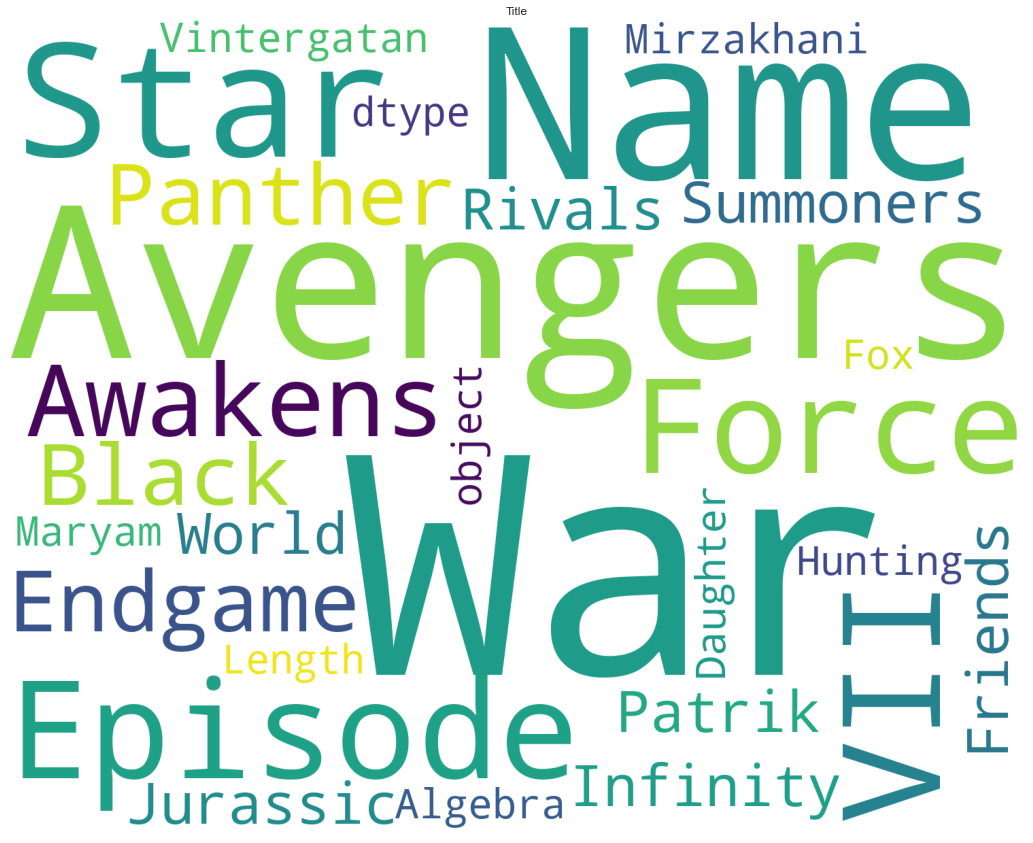

In [42]:
import random
from wordcloud import WordCloud, STOPWORDS
text = (str(df['Name']))
plt.subplots(figsize=(20,15))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1500,
                          height=1200
                         ).generate(text)


plt.imshow(wordcloud)
plt.title('Title')
plt.axis('off')
plt.show()

Most of the movies have title with names like avengers, war, star, episode, infinity, force, fox, black etc

In [31]:
df.isnull().sum()

Name              0
Year              0
Rating          442
Length          225
Votes           355
Certificate       8
Metascore      1554
Genre            24
Hero            157
Director        107
Gross           530
dtype: int64

## Uni-Variate analysis for Continuous variables

### 1.Rating

<AxesSubplot:xlabel='Rating', ylabel='Density'>

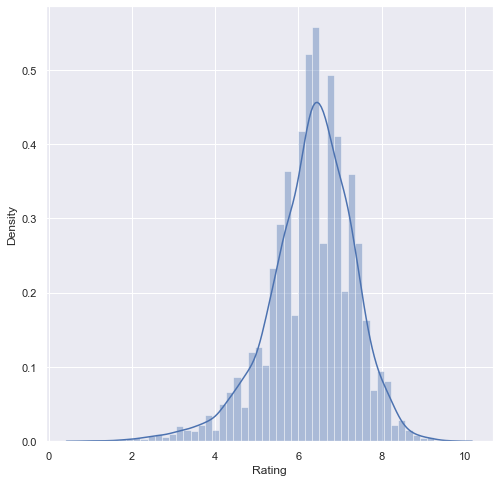

In [53]:
sn.set(rc={'figure.figsize':(8,8)})
sn.distplot(df["Rating"])

Rating has bell shaped distribution with mode at 6.3, and most of the values lie between 4 and 8.

<AxesSubplot:xlabel='Rating'>

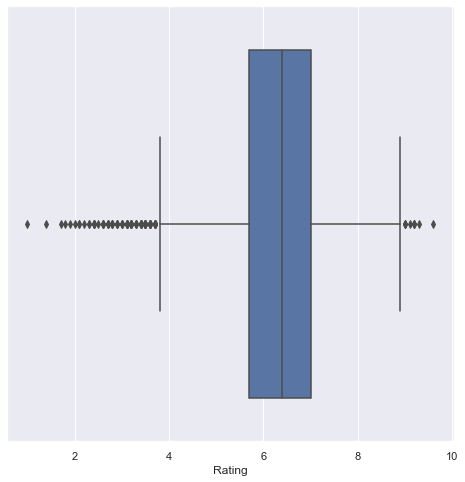

In [54]:
sn.boxplot(df["Rating"])

Outliers are present on both sides for variable rating. On left side due to some very bad movies low ratings are recorded. On the right side, due to some extraordinary blockbusters high ratings are given

### 2.Length

[[<matplotlib.axis.XTick at 0x1ea9c4b7880>,

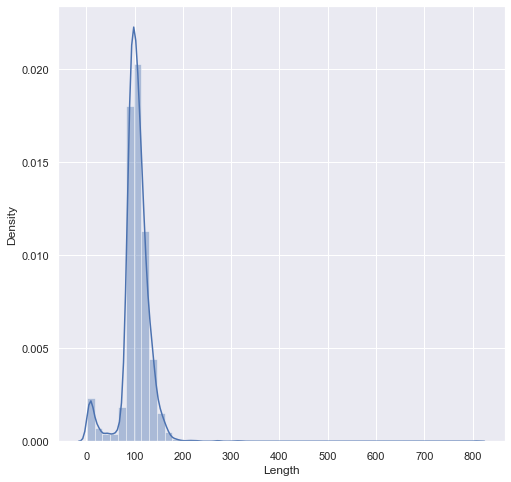

In [55]:
sn.distplot(df["Length"]).set(xticks=[0,100,200,300,400,500,600,700,800])

Length has right skewed distribution where mode is present at 120 and most of values lie between 80 to 180 minutes, Outliers are more present on right side because of webseries, and on leftside very few outliers are there because of short films

<AxesSubplot:xlabel='Length'>

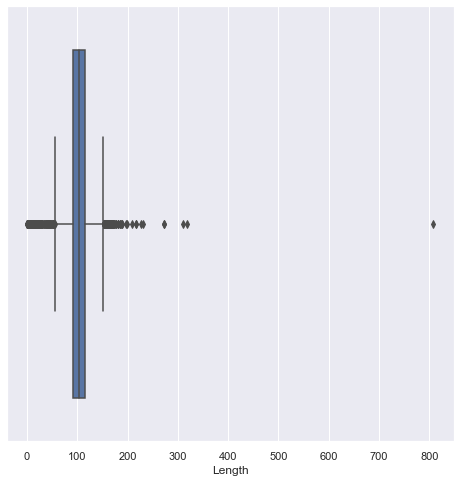

In [56]:
sn.boxplot(df["Length"])

Length is too big for webseries compared to normal movies. Thus length has outliers on right side because of some webseries. And also some of the short films has too less short length when compared to normal films. Thus length has outliers on the left side.

### 3. Votes

<AxesSubplot:xlabel='Votes', ylabel='Density'>

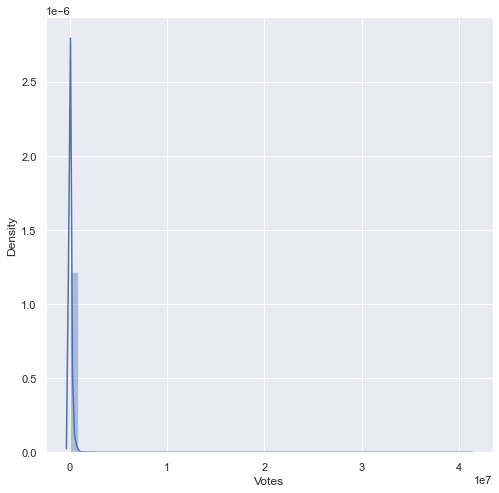

In [57]:
sn.distplot(df["Votes"])

Votes has right skewed distribution and has outliers present at the right side because few movies are viewed many viewers and voted many times. Votes will be voted with time. So those films which had released earlier years may got so many high votes compared to recent films

<AxesSubplot:xlabel='Votes'>

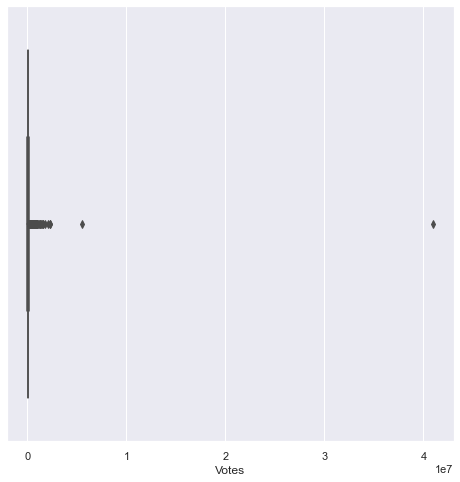

In [58]:
sn.boxplot(df["Votes"])

Votes has outliers present at the right side because few movies are viewed many viewers and voted many times and got high votes compared to normally viewed films

### 4.Metascore

<AxesSubplot:xlabel='Metascore', ylabel='Density'>

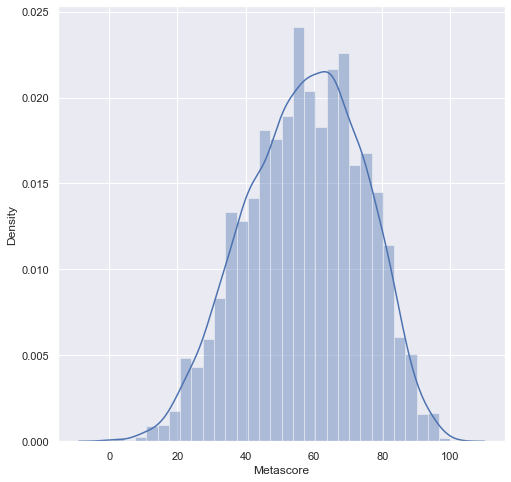

In [60]:
sn.distplot(df["Metascore"])

Metascore has normal distribution with bell shaped and is not skewed. The median is near 60 and most of the records have metascore between 40 to 80.

<AxesSubplot:xlabel='Metascore'>

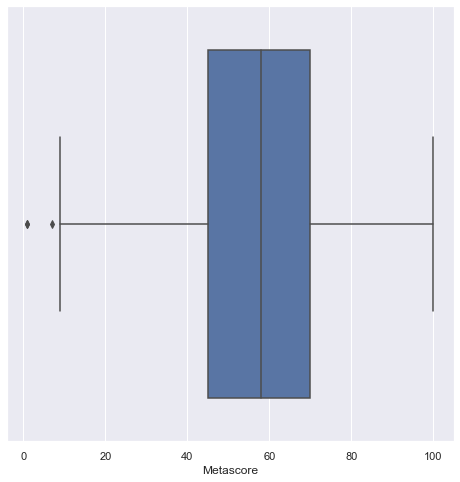

In [61]:
sn.boxplot(df["Metascore"])

Metascore has very very few outliers on left side and no outliers on the right side

### 5. Gross

<AxesSubplot:xlabel='Gross', ylabel='Density'>

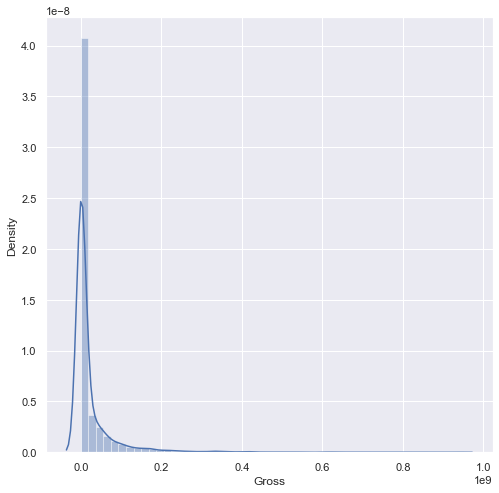

In [62]:
sn.distplot(df["Gross"])

Grossis right skewed with more tail on right side. This is because only few blockbusters has high collections compared to normal movies 

<AxesSubplot:xlabel='Gross'>

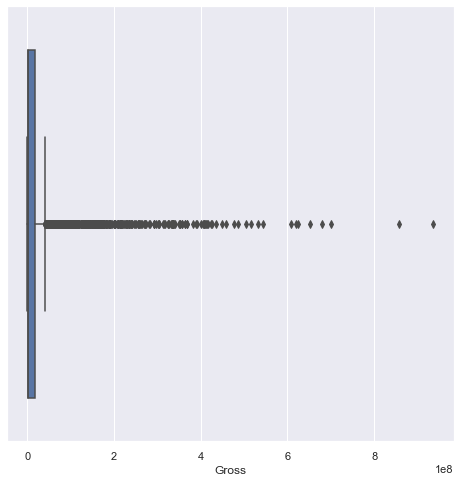

In [63]:
sn.boxplot(df["Gross"])

Gross has no outliers on left side which means it has collections good for all films. On the right side, outliers are there for few movies which means there are movies with large collections which are blockbusters

# Uni Variate analysis for categorical variables

### 1. Year

<AxesSubplot:>

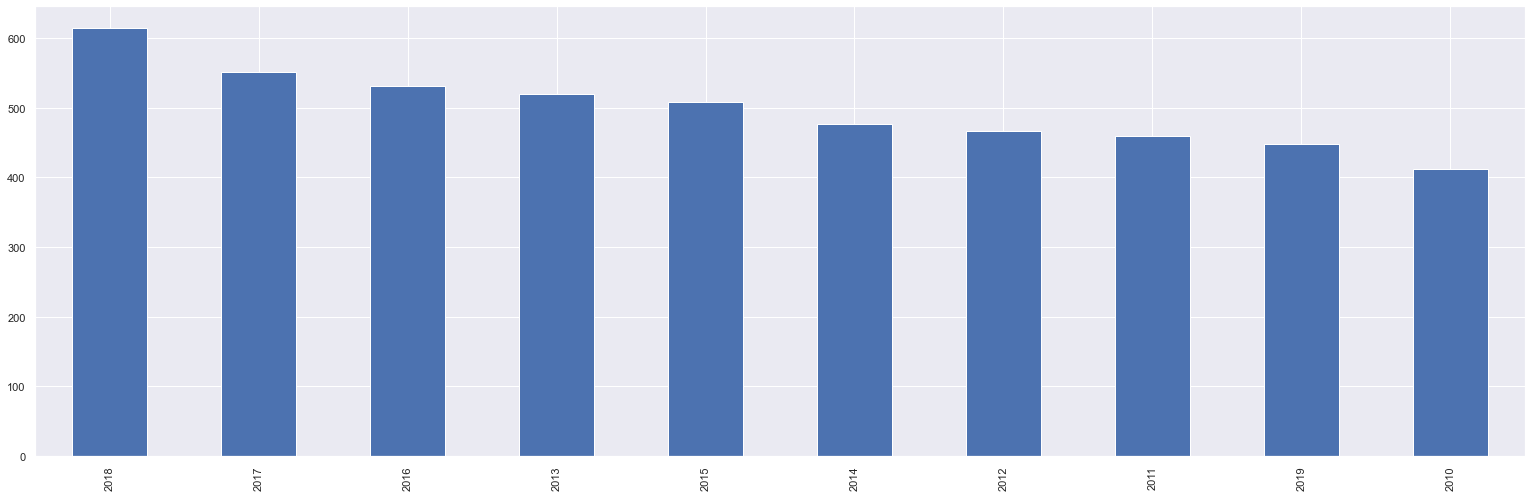

In [41]:
sn.set_style("darkgrid")
sn.set(rc={'figure.figsize':(26.7,8.27)})
df["Year"].value_counts()[0:10].plot(kind="bar")

Numbers of movies releasing per year is clearly increasing as number of movies released in 2018, 2017, 2016 is more than that of 2010,2011,2012 etc. So there is increasing trend with year for number of movies released

### 2. Certificate

In [77]:
df["Certificate"].value_counts()

R                                       1107
UA                                       604
PG-13                                    512
A                                        352
U                                        244
                                        ... 
\nDrama, Mystery, Sci-Fi                   1
\nDrama, Thriller                          1
175 min                                    1
61 min                                     1
42 min                                     1
Name: Certificate, Length: 232, dtype: int64

<AxesSubplot:>

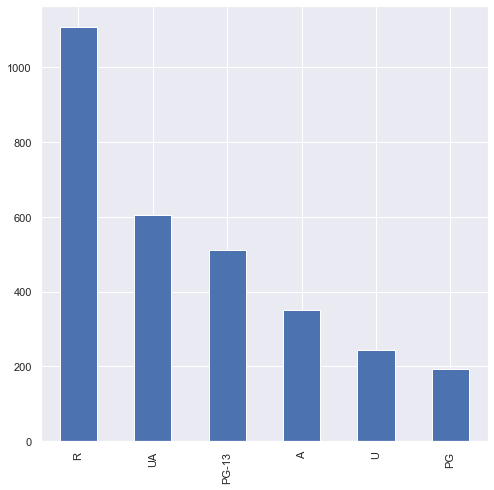

In [69]:
df["Certificate"].value_counts()[df["Certificate"].value_counts()>100].plot(kind='bar')

R certificate movies are more produced than any other certificate films. PG certificate films are least produced films during years 2011 to 2019. UA certified films are second largest produced films, followed by PG-13, A, U certificate films.

### 3. Genre

In [80]:
def explode(df, lst_cols, fill_value=''):
    # make sure `lst_cols` is a list
    if lst_cols and not isinstance(lst_cols, list):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)

    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()

    if (lens > 0).all():
        # ALL lists in cells aren't empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .loc[:, df.columns]
    else:
        # at least one list in cells is empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .append(df.loc[lens==0, idx_cols]).fillna(fill_value) \
          .loc[:, df.columns]

In [86]:
df_q1=df.copy(deep=True)

df_q1.drop(df.columns.difference(['Rating', 'Genre', 'Name','Year']), 1, inplace=True)

# Splitting the various genres using the delimeter 
df_q1.Genre = df["Genre"].str.split(',')

In [87]:
df_q1.head()

,Name,Year,Rating,Genre
0,Star Wars: Episode VII - The Force Awakens,2015,7.9,"[Action, Adventure, Sci-Fi]"
1,Avengers: Endgame,2019,8.4,"[Action, Adventure, Drama]"
2,Black Panther,2018,7.3,"[Action, Adventure, Sci-Fi]"
3,Avengers: Infinity War,2018,8.4,"[Action, Adventure, Sci-Fi]"
4,Jurassic World,2015,7.0,"[Action, Adventure, Sci-Fi]"


In [88]:
df_q1.dropna(inplace = True);
df_q1 = explode(df_q1, ['Genre'])

In [89]:
df_q1["Genre"]=df_q1["Genre"].apply(lambda x: x.strip())

In [90]:
df_q1.shape

(10754, 4)

In [91]:
df_q1['Genre'].value_counts()

Drama          2845
Comedy         1544
Action          964
Romance         728
Adventure       664
Thriller        651
Crime           618
Horror          400
Biography       376
Mystery         337
Fantasy         285
Animation       254
Sci-Fi          229
Family          200
History         199
Music           143
Sport            75
War              74
Short            57
Musical          44
Western          33
Documentary      25
Talk-Show         4
Reality-TV        3
Game-Show         1
News              1
Name: Genre, dtype: int64

In [92]:
popular_genres = df_q1['Genre'].value_counts()

<AxesSubplot:>

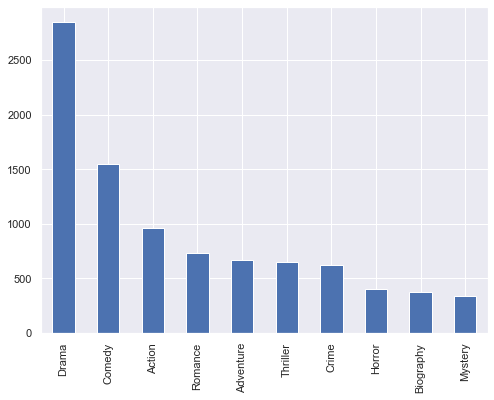

In [105]:
sn.set(font_scale=1)
popular_genres[0:10].plot(kind="bar", sort_columns=True)

Drama, Comedy, Action, Romance and Adventure are top 5 genres respectively preferred by film makers followed by Thriller, Crime, Horror, Biography, Mystery

### 4. Director

In [106]:
top_directors = (df.groupby('Director')['Name'].count()).sort_values(ascending=False)

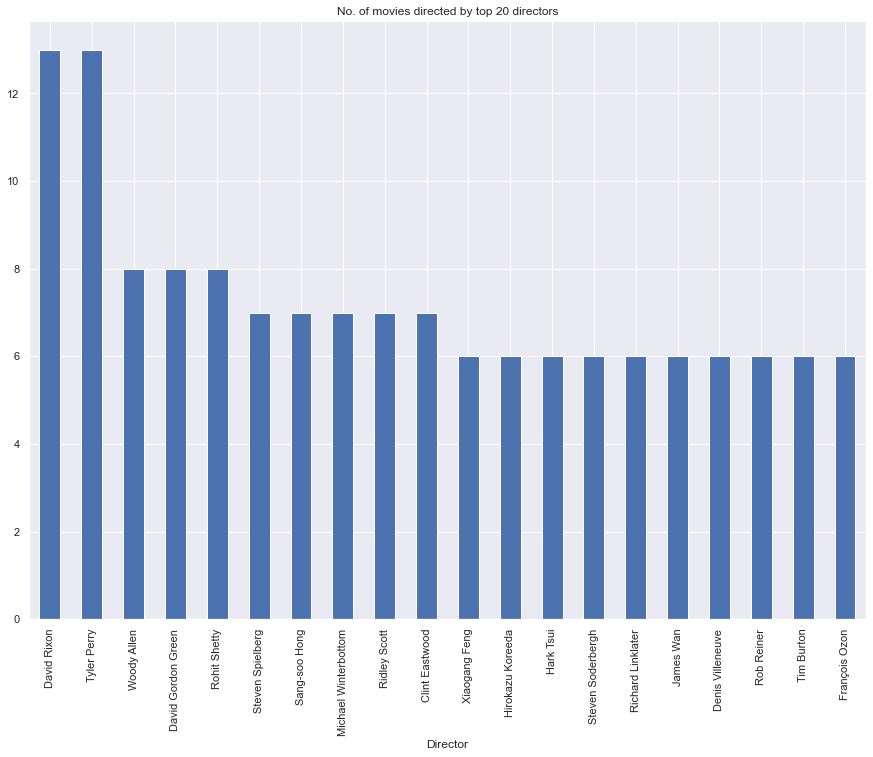

In [110]:
top_directors[:20].plot(kind='bar', figsize=(15,11), title='No. of movies directed by top 20 directors').yaxis.label.set_visible(False)

David Rixon and Tyler Perry had directed more number of films than any other director. Both of these directors has directed 13 fims in 9 years. Fracois Ozon is least directed director with 6 movies.

### 5. Hero

In [111]:
df_q2=df.copy(deep=True)
df_q2.drop(df.columns.difference(['Rating', 'Hero', 'Name','Year']), 1, inplace=True)

# Splitting the various genres using the delimeter 
df_q2.Hero = df["Hero"].str.split(',')

df_q2.dropna(inplace = True);
df_q2 = explode(df_q2, ['Hero'])

df_q2["Hero"]=df_q2["Hero"].apply(lambda x: x.strip())

In [112]:
df_q2.head()

,Name,Year,Rating,Hero
0,Star Wars: Episode VII - The Force Awakens,2015,7.9,Daisy Ridley
1,Star Wars: Episode VII - The Force Awakens,2015,7.9,John Boyega
2,Star Wars: Episode VII - The Force Awakens,2015,7.9,Oscar Isaac
3,Star Wars: Episode VII - The Force Awakens,2015,7.9,Domhnall Gleeson
4,Avengers: Endgame,2019,8.4,Robert Downey Jr.


In [113]:
df_q2.shape

(18068, 4)

In [116]:
df_q2["Hero"].value_counts()[0:50]

Steve Carell           21
Dwayne Johnson         21
Akshay Kumar           21
Liam Neeson            21
Robert De Niro         21
James Franco           20
Mark Wahlberg          20
Michael Fassbender     20
Owen Wilson            19
Jesse Eisenberg        19
Anna Kendrick          19
Emily Blunt            18
Nicole Kidman          18
Channing Tatum         18
Matthew McConaughey    18
Naomi Watts            18
Kristen Wiig           17
Michael Shannon        17
Joel Edgerton          17
Jennifer Lawrence      17
Deepika Padukone       17
Julianne Moore         17
James McAvoy           17
Chloë Grace Moretz     17
Cate Blanchett         17
Woody Harrelson        17
Kristen Stewart        17
Ethan Hawke            17
Bradley Cooper         16
Jessica Chastain       16
Emma Stone             16
Anne Hathaway          16
Samuel L. Jackson      16
Helen Mirren           16
Juliette Binoche       16
Matt Damon             16
Ryan Reynolds          16
Elle Fanning           16
Kevin Hart  

<AxesSubplot:>

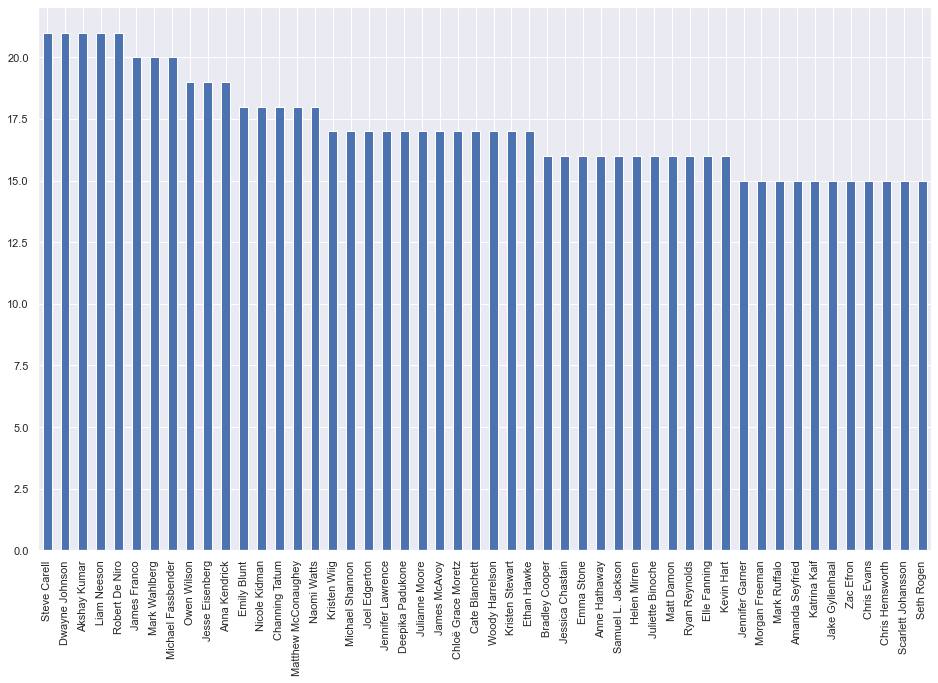

In [118]:
sn.set(rc={'figure.figsize':(16,10)})
df_q2["Hero"].value_counts()[0:50].plot(kind="bar")

Steve Carell, Dwayne Johnson, Akshay Kumar, Liam Neeson, Robert De Niro are top actors with 21 movies and Jennifer Garner, Morgan Freeman, Mark Ruffalo, Amanda Seyfried, Katrina Kaif, Jake Gyllenhal, Zac Efron, Chris Evans, Chris Hemsworth, Scarlett Johansson, Seth Rogen are least acctors acted stars with 15 movies.

## Bi-variate Analysis

### Bivariate Analysis for Continuous- Continuous variables:

### First let look into the correlation between continuous variables all in one picture ( Correlation map):

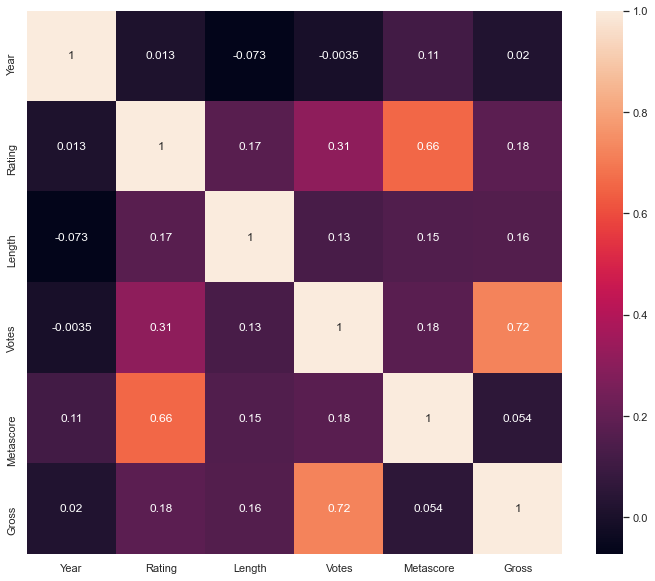

In [119]:
bar,ax = plt.subplots(figsize=(12,10))
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

Metascore and Rating are positively correlated with R value as 0.66 and Votes and Gross are positively correlated with R=0.72 rest are not correlated

### Length vs Rating

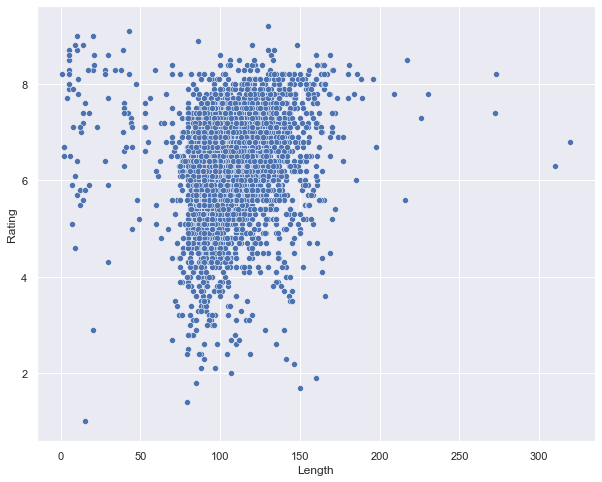

In [124]:
bar,ax = plt.subplots(figsize=(10,8))
sn.scatterplot(data=df[df["Length"]<400], y="Rating", x="Length")
plt.show()

Length of the movie and Ratings of the movie has no correlation from the graph. Ratings are given irrespective of the length of the movie.

### 2. Rating vs Votes

<AxesSubplot:xlabel='Votes', ylabel='Rating'>

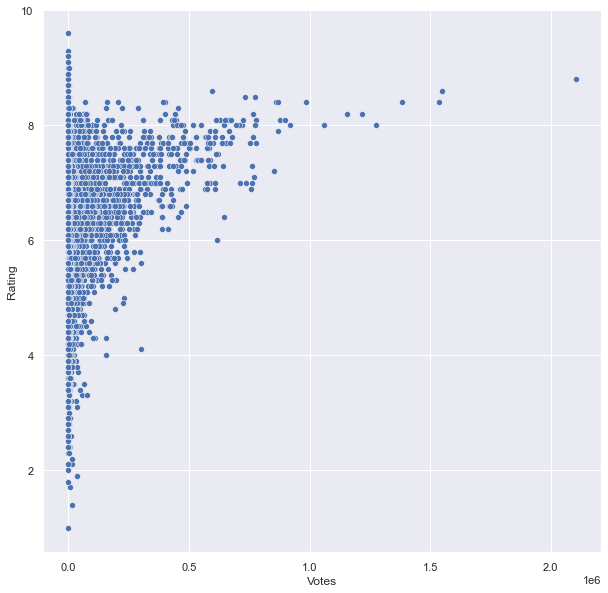

In [127]:
bar,ax = plt.subplots(figsize=(10,10))
sn.scatterplot(data=df, y="Rating", x="Votes")

There is clear relation which states that for low votes, rating is irrespective of votes, and if number of votes increases, rating will go up and settles at somewhere around 8

### 3. Rating va Metascore

<AxesSubplot:xlabel='Metascore', ylabel='Rating'>

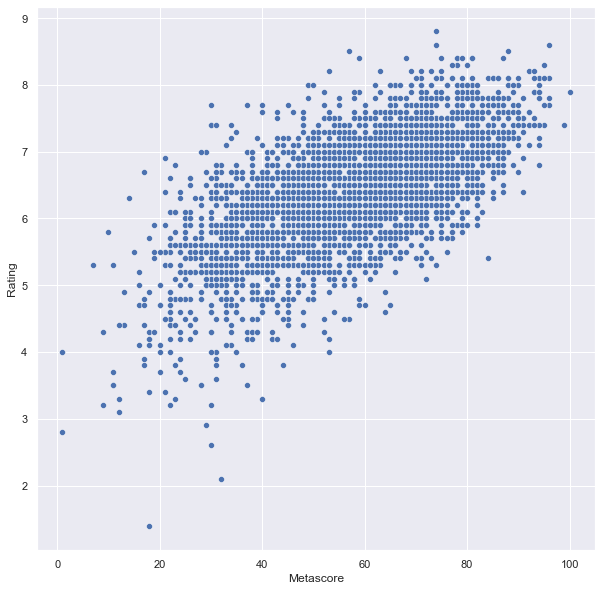

In [128]:
bar,ax = plt.subplots(figsize=(10,10))
sn.scatterplot(data=df, y="Rating", x="Metascore")

There is a clear positive relation between metscore and ratings. If rating is given high, then metascore would also be given high.

### 4. Rating vs Gross

<AxesSubplot:xlabel='Gross', ylabel='Rating'>

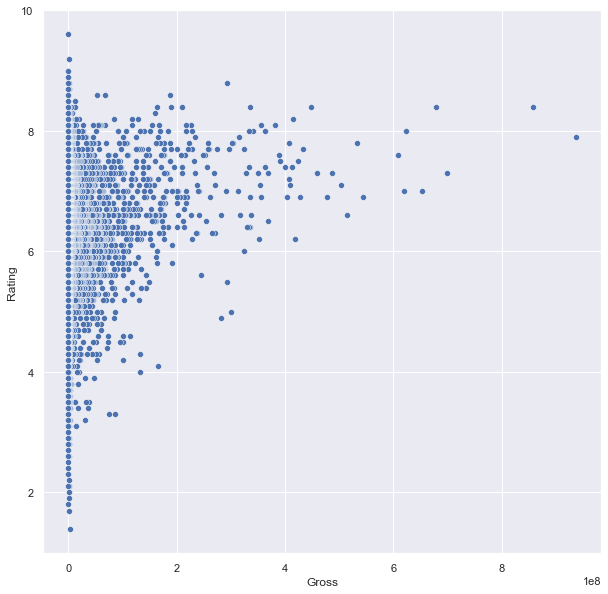

In [129]:
bar,ax = plt.subplots(figsize=(10,10))
sn.scatterplot(data=df, y="Rating", x="Gross")

There is clear relation which states that for low gross, rating is irrespective of gross, and if gross collections increases, rating will go up and settles at somewhere around 8

### 5. Length vs Votes

<AxesSubplot:xlabel='Length', ylabel='Votes'>

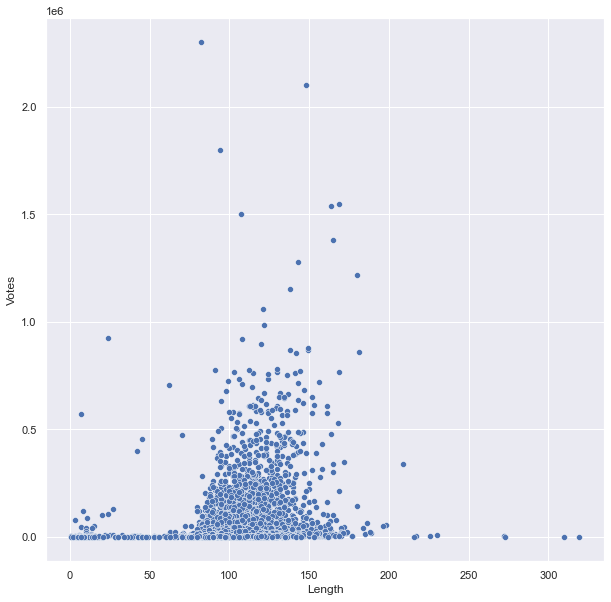

In [132]:
bar,ax = plt.subplots(figsize=(10,10))
sn.scatterplot(data=df[df["Votes"]<3*(10**6)][df[df["Votes"]<3*(10**6)]["Length"]<400], y="Votes", x="Length")

There is no clear relation between votes and length of the movie. Low votes are recorded for all length ranges of the movies. High number of votes were recorded for the movies that have length in the range of 80 to 180 minutes compared to rest of the movies lengths.

### 6. Length vs Metascore

<AxesSubplot:xlabel='Length', ylabel='Metascore'>

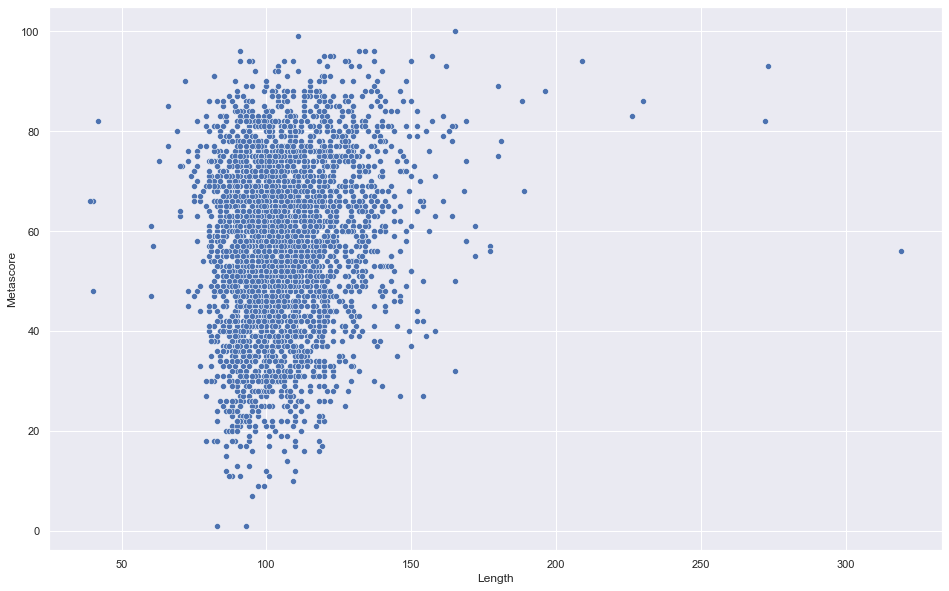

In [134]:
sn.scatterplot(data=df[df["Length"]<400], y="Metascore", x="Length")

There is no clear relation between metascore and the length of the movie. Metascore is given irrespective of the length of the movie.

### 7. Length vs Gross

<AxesSubplot:xlabel='Length', ylabel='Gross'>

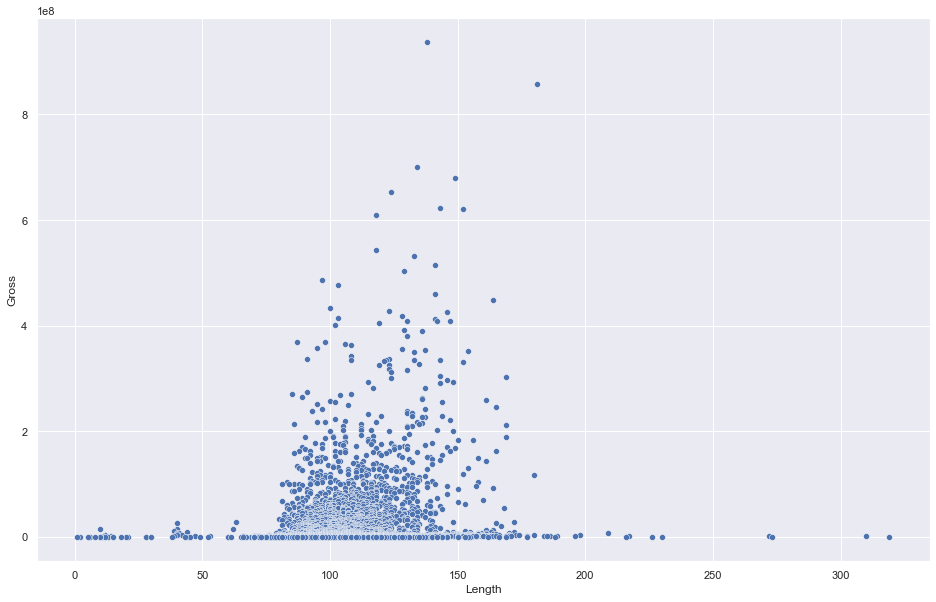

In [135]:
sn.scatterplot(data=df[df["Length"]<400], y="Gross", x="Length")

There is no clear relation between gross and length of the movie. Low gross is recorded for all length ranges of the movies. High gross collections were recorded for the movies that have length in the range of 80 to 180 minutes compared to rest of the movies gross collections.

### 8. Votes vs Metascore

<AxesSubplot:xlabel='Votes', ylabel='Metascore'>

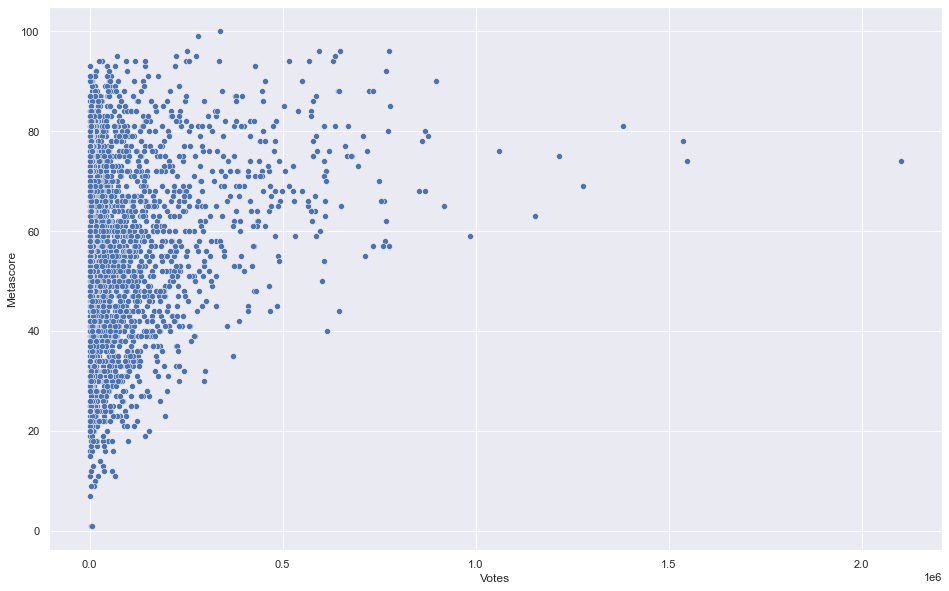

In [136]:
sn.scatterplot(data=df, y="Metascore", x="Votes")

There is clear relation which states that for low votes, metascore is irrespective of votes, and if votes increases, metascore will go up and settles at somewhere around 80

### 9. Votes vs Gross

<AxesSubplot:xlabel='Votes', ylabel='Gross'>

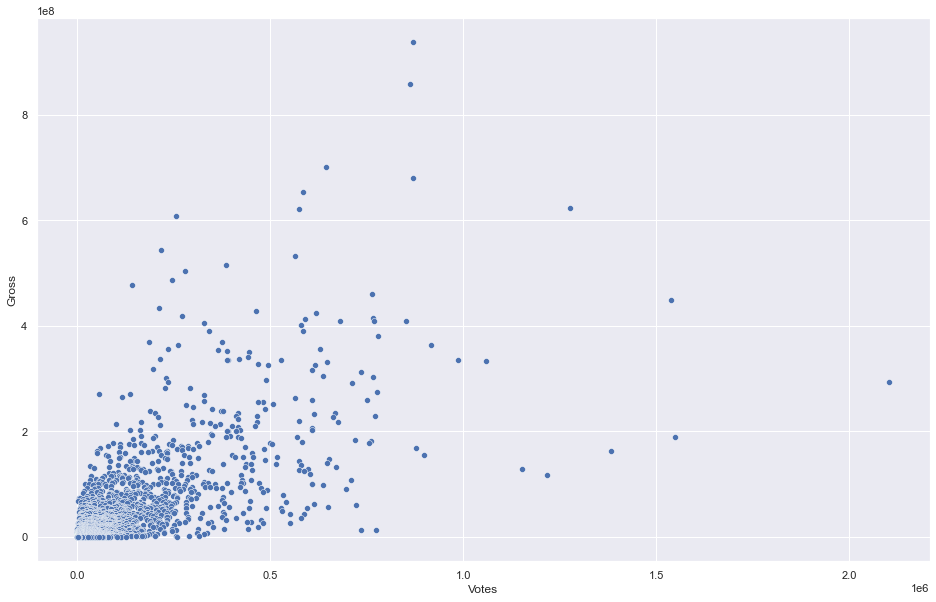

In [137]:
sn.scatterplot(data=df, y="Gross", x="Votes")

votes is positively correlated to gross collections. If there is high gross, votes will be very high. If there is less gross, votes will be less.

### 10. Metascore vs gross

<AxesSubplot:xlabel='Gross', ylabel='Metascore'>

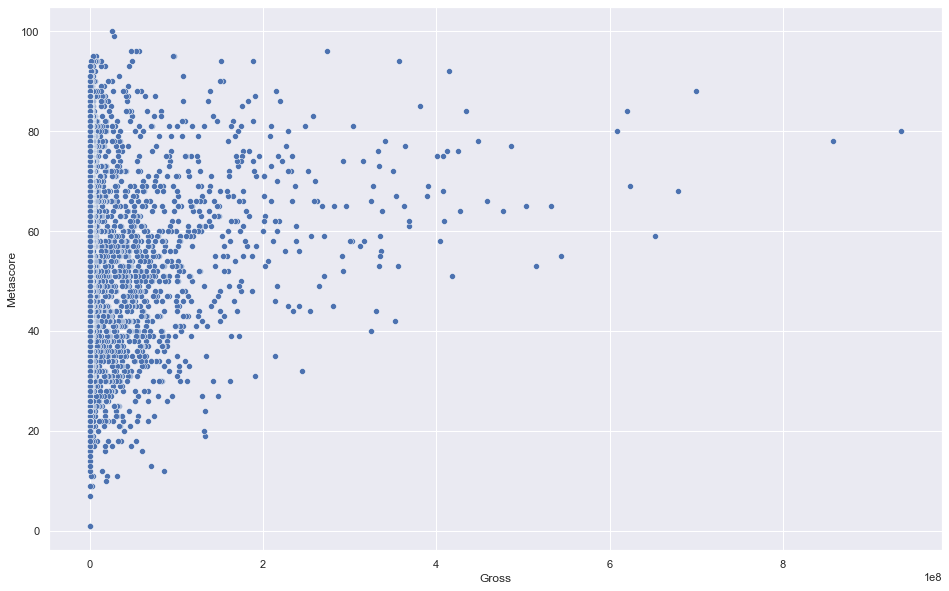

In [138]:
sn.scatterplot(data=df, y="Metascore", x="Gross")

There is clear relation which states that for low gross, metascore is irrespective of gross, and if gross collections increases, metascore will go up and settles at somewhere around 80

# Bivariate Analysis for Categorical vs Categorical variables

### 1. Year vs Certificate

In [142]:
df3=df.copy(deep=True)
df3.drop(df.columns.difference(['Rating', 'Certificate', 'Name','Year']), 1, inplace=True)

# Splitting the various genres using the delimeter 
df3.Certificate = df["Certificate"].str.split(',')

df3.dropna(inplace = True);
df3 = explode(df3, ['Certificate'])

df3["Certificate"]=df3["Certificate"].apply(lambda x: x.strip().rstrip())

In [144]:
df3.head(3)

,Name,Year,Rating,Certificate
0,Star Wars: Episode VII - The Force Awakens,2015,7.9,U
1,Avengers: Endgame,2019,8.4,UA
2,Black Panther,2018,7.3,UA


In [143]:
df3.shape

(4577, 4)

In [146]:
df3["Certificate"].value_counts()[0:25]

R            1107
UA            604
PG-13         512
A             352
U             243
PG            194
90 min         61
98 min         42
100 min        41
18             40
97 min         38
93 min         38
96 min         37
95 min         35
Not Rated      33
85 min         32
94 min         29
103 min        29
87 min         28
110 min        28
102 min        28
91 min         27
92 min         26
105 min        26
88 min         25
Name: Certificate, dtype: int64

In [147]:
ctf = ["U", "UA", "A", "R", "PG", "PG-13"]
ind=[]
for i in df3["Certificate"]:
    if i in ctf:
        ind.append(True)
    else:
        ind.append(False)

In [148]:
df3[ind]

,Name,Year,Rating,Certificate
0,Star Wars: Episode VII - The Force Awakens,2015,7.9,U
1,Avengers: Endgame,2019,8.4,UA
2,Black Panther,2018,7.3,UA
3,Avengers: Infinity War,2018,8.4,UA
4,Jurassic World,2015,7.0,UA
...,...,...,...,...
4520,DK Bose,2019,6.3,U
4547,Manoharam,2019,6.8,U
4558,July Kaatril,2019,5.6,UA
4566,Pengalila,2019,8.3,U


In [150]:
pd.crosstab(df3[ind]["Year"],df3[ind]['Certificate'])

Certificate,A,PG,PG-13,R,U,UA
Year,,,,,,
2010,27,18,53,121,34,42
2011,39,17,60,126,25,51
2012,46,17,59,114,27,58
2013,58,15,64,136,21,58
2014,33,25,60,129,24,58
2015,24,22,62,135,18,48
2016,22,28,52,106,27,82
2017,36,18,40,103,16,86
2018,35,23,44,103,18,79


This table shows the year wise sum of movies belonged to A, PG, PG-13, R, U, UA. The R certificate films are top category films in any year except 2019. PG-13 certificate has decreasing trend over years and UA certificate films have increasing trend over year. There is constant trend in U, PG, A certificate films over year.

### 2. Year vs Genre

In [157]:
df_q1.tail()

,Name,Year,Rating,Genre
10749,La reina de los lagartos,2019,4.8,Fantasy
10750,Summoners War: Friends & Rivals,2019,5.1,Animation
10751,Summoners War: Friends & Rivals,2019,5.1,Short
10752,Summoners War: Friends & Rivals,2019,5.1,Adventure
10753,Vintergatan,2018,8.9,Short


In [160]:
gen = ["Drama", "Action", "Romance", "Adventure", "Thriller", "Crime", "Horror", "Biography", "Mystery"]  
ind2=[]
for i in df_q1["Genre"]:
    if i in gen:
        ind2.append(True)
    else:
        ind2.append(False)

In [161]:
pd.crosstab(df_q1[ind2]["Year"],df_q1[ind2]['Genre'])

Genre,Action,Adventure,Biography,Crime,Drama,Horror,Mystery,Romance,Thriller
Year,,,,,,,,,
2010,81,50,24,62,253,33,25,85,55
2011,99,61,20,51,274,35,33,83,64
2012,83,55,21,48,267,40,31,79,72
2013,104,68,40,81,315,48,30,86,84
2014,104,69,40,65,292,41,37,92,76
2015,105,74,48,59,329,24,46,75,62
2016,123,76,57,62,303,53,31,69,62
2017,89,78,53,73,342,50,40,63,63
2018,113,82,56,85,327,45,42,62,75


This table shows the year wise sum of movies belonged to Action, Adventure, Biography, Crime, Drama, Horror, Mystery, Romance, Thriller genres. The Drama genre films are top genre films in any year. Romance genre has decreasing trend over years and Biography genre films have increasing trend over year. There is constant trend for any other genre.

### 3. Genre vs Certificate

In [165]:
df4=df.copy(deep=True)
df4.drop(df.columns.difference(['Genre', 'Certificate']), 1, inplace=True)

# Splitting the various genres using the delimeter 
df4.Genre = df["Genre"].str.split(',')

df4.dropna(inplace = True);
df4 = explode(df4, ['Genre'])

df4["Genre"]=df4["Genre"].apply(lambda x: x.strip().rstrip())

In [166]:
df4.tail(2)

,Certificate,Genre
11479,66 min,Crime
11480,66 min,Drama


In [167]:
ind3=[]
for i in df4["Genre"]:
    if i in gen:
        ind3.append(True)
    else:
        ind3.append(False)

In [168]:
ind4=[]
for i in df4[ind3]["Certificate"]:
    if i in ctf:
        ind4.append(True)
    else:
        ind4.append(False)

In [172]:
pd.crosstab(df4[ind3][ind4]["Genre"],df4[ind3][ind4]['Certificate'])

Certificate,A,PG,PG-13,R,U,UA
Genre,,,,,,
Action,121,17,70,174,61,316
Adventure,34,65,48,67,122,206
Biography,33,24,70,103,20,50
Crime,98,4,36,223,9,78
Drama,187,116,377,785,98,273
Horror,80,0,34,128,0,24
Mystery,52,3,38,94,3,36
Romance,43,25,126,182,24,97
Thriller,99,1,59,200,7,100


This table shows the genre wise sum of movies belonged to A, PG, PG-13, R, U, UA.
Most of the action movies are UA certified films. Least of the action genre movies are certified with PG.
UA certificate is issued for most of the Adventure genre movies. A certificate is least certified category in adventure genre movies.
R certificate is issued for most of the Biography genre movies. U certificate is least certified category in Biography genre movies.
Most of the crime genre movies are R certified films. Least of the crime genre movies are certified with PG.
Most of the Drama movies are R certified films. Least of the drama genre movies are certified with U.

# Bi Variate analysis between Continuous vs Categorical variables

### 1. Rating vs Year

<AxesSubplot:xlabel='Year', ylabel='Rating'>

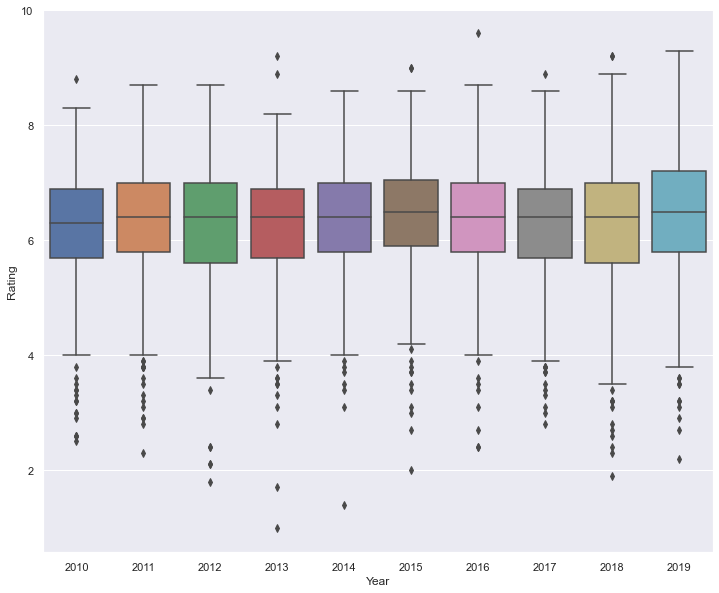

In [179]:
bar, ax=plt.subplots(figsize=(12,10))
sn.boxplot(x="Year",y="Rating",data=df[df["Year"]<2020])

The median rating has similar trend over the year. During the year 2013 very low rating movies are released. Thus it has outliers on the left side of the median less than any other year. During the year 2016, very high rated movies are released. Thus having outliers on positive side of the median, higher than any other year.

<AxesSubplot:xlabel='Year'>

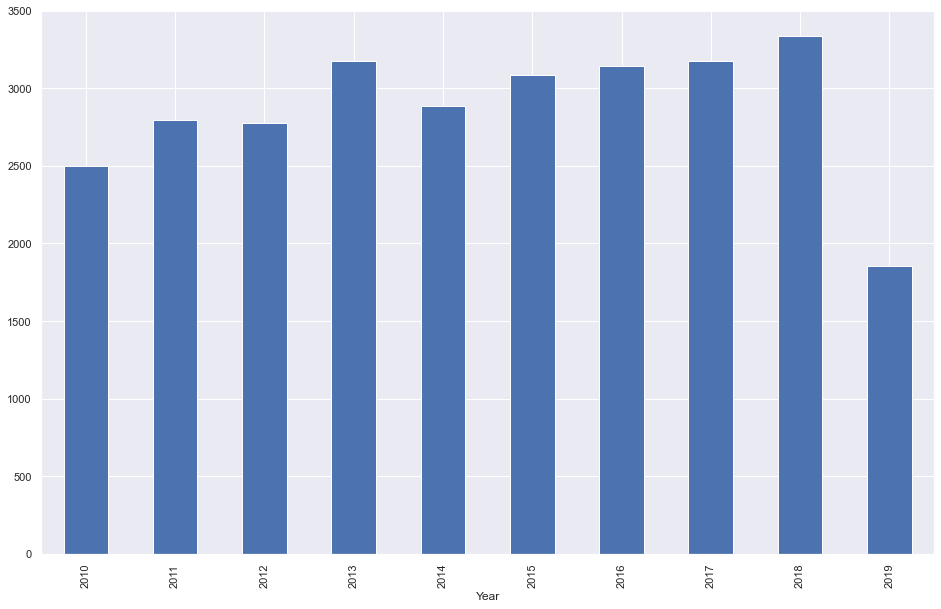

In [184]:
temp = df[df["Year"]<2020].groupby(["Year"]).Rating.sum()
temp.plot(kind='bar', stacked=True)

The total ratings count is high for the year 2018 and least for the year 2019

### 2. Rating vs Certificate

<AxesSubplot:xlabel='Certificate', ylabel='Rating'>

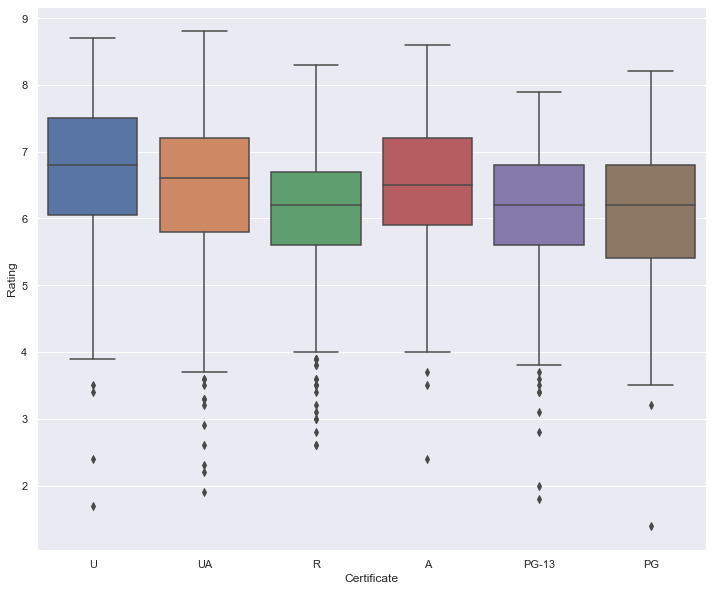

In [191]:
bar, ax=plt.subplots(figsize=(12,10))
sn.boxplot(x="Certificate",y="Rating",data=df3[ind])

The median rating has different trend for different certificate films. For R certificate films, median rating is low and for U certificte films the median rating rating is high. Maximum ratings are given for U certificate films. PG certificate films have minimum ratings compared other certificate films.

<AxesSubplot:xlabel='Certificate'>

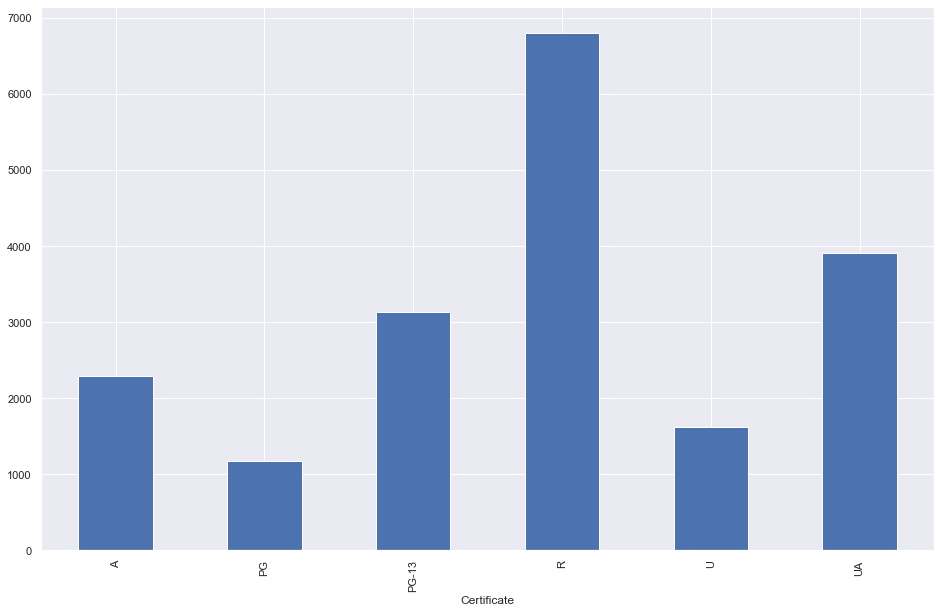

In [192]:
temp1 = df3[ind].groupby(["Certificate"]).Rating.sum()
temp1.plot(kind='bar', stacked=True)

The total ratings count is high for the R certificate films and least for the PG certificate films.

### 3. Rating vs Genre

<AxesSubplot:xlabel='Genre', ylabel='Rating'>

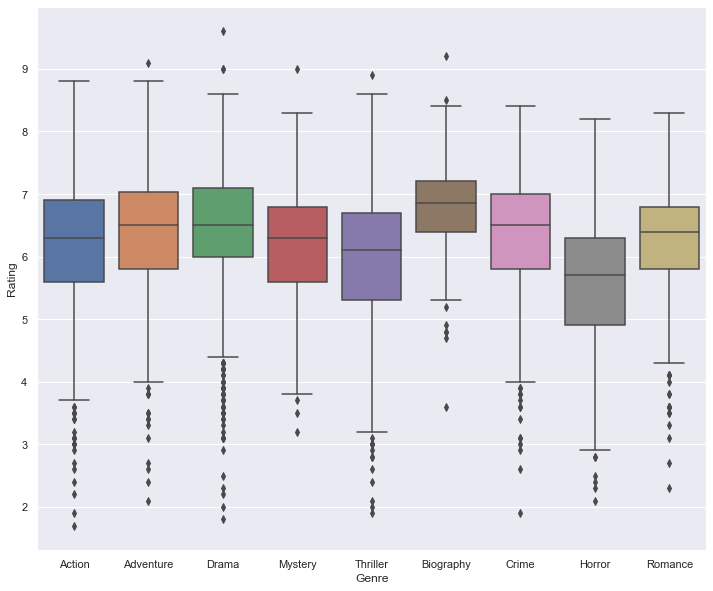

In [193]:
bar, ax=plt.subplots(figsize=(12,10))
sn.boxplot(x="Genre",y="Rating",data=df_q1[ind2])

The median rating has different trend for different genre films. For Biography genre, median rating is high, and for Horro genre  films the median rating rating is low. Maximum ratings are given for Drama films. Action films have minimum ratings compared other genre films.

<AxesSubplot:xlabel='Genre'>

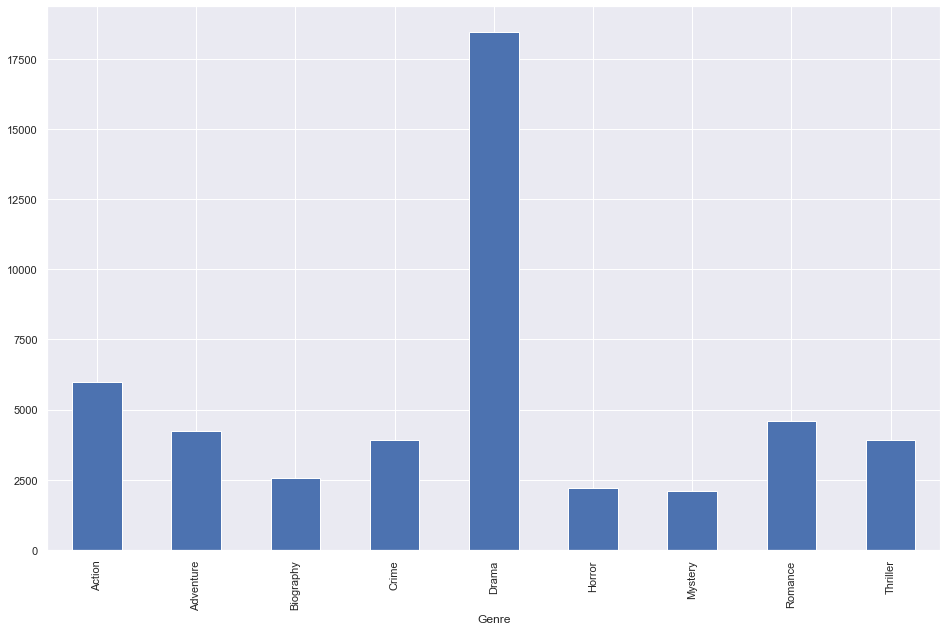

In [194]:
temp = df_q1[ind2].groupby(["Genre"]).Rating.sum()
temp.plot(kind='bar', stacked=True)

The total ratings count is high for the Drama genre and least for the mystery and horror genre movies

### 4. Gross vs Certificate

In [202]:
df5=df.copy(deep=True)
df5.drop(df.columns.difference(['Genre', 'Certificate', 'Gross']), 1, inplace=True)

# Splitting the various genres using the delimeter 
df5.Certificate = df["Certificate"].str.split(',')


df5.dropna(inplace = True);
df5 = explode(df5, ['Certificate'])

df5["Certificate"]=df5["Certificate"].apply(lambda x: x.strip().rstrip())

In [203]:
ind5=[]
for i in df5["Certificate"]:
    if i in ctf:
        ind5.append(True)
    else:
        ind5.append(False)

<AxesSubplot:xlabel='Certificate', ylabel='Gross'>

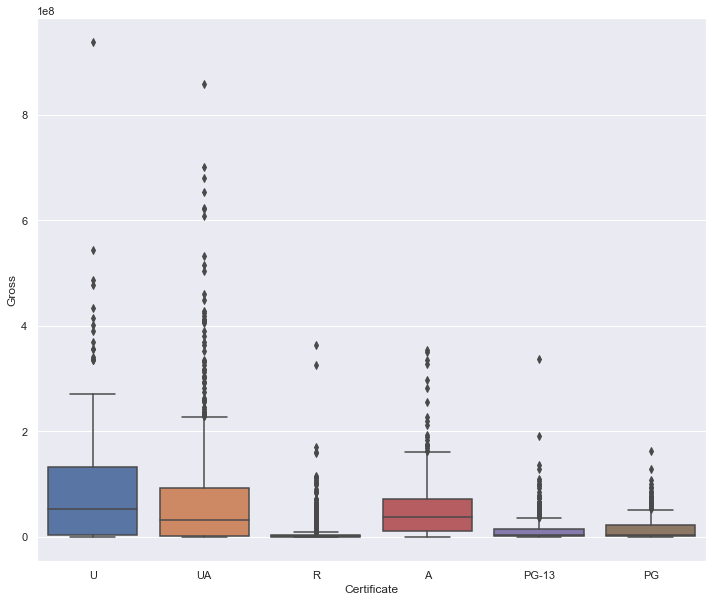

In [204]:
bar, ax=plt.subplots(figsize=(12,10))
sn.boxplot(x="Certificate",y="Gross",data=df5[ind5])

The median gross has different trend for different certificate films. For R certificate films median gross is less, and for U certificte films the median gross is high. Maximum gross is collected by U certificate films. R certificate films have minimum gross compared other certificate films.

<AxesSubplot:xlabel='Certificate'>

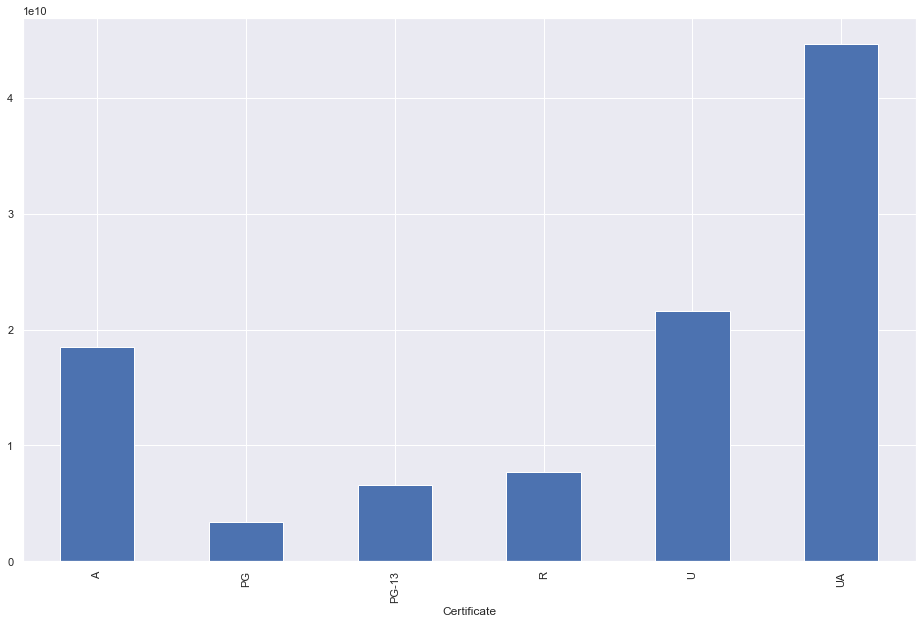

In [205]:
temp3 = df5[ind5].groupby(["Certificate"]).Gross.sum()
temp3.plot(kind='bar', stacked=True)

The total gross count is high for the UA certificate films and least for the PG certificate films.

### Genre vs Gross

In [207]:
df6=df.copy(deep=True)
df6.drop(df.columns.difference(['Genre', 'Certificate', 'Gross']), 1, inplace=True)

# Splitting the various genres using the delimeter 
df6.Genre = df["Genre"].str.split(',')


df6.dropna(inplace = True);
df6 = explode(df6, ['Genre'])

df6["Genre"]=df6["Genre"].apply(lambda x: x.strip().rstrip())

In [208]:
ind6=[]
for i in df6["Genre"]:
    if i in gen:
        ind6.append(True)
    else:
        ind6.append(False)

<AxesSubplot:xlabel='Genre', ylabel='Gross'>

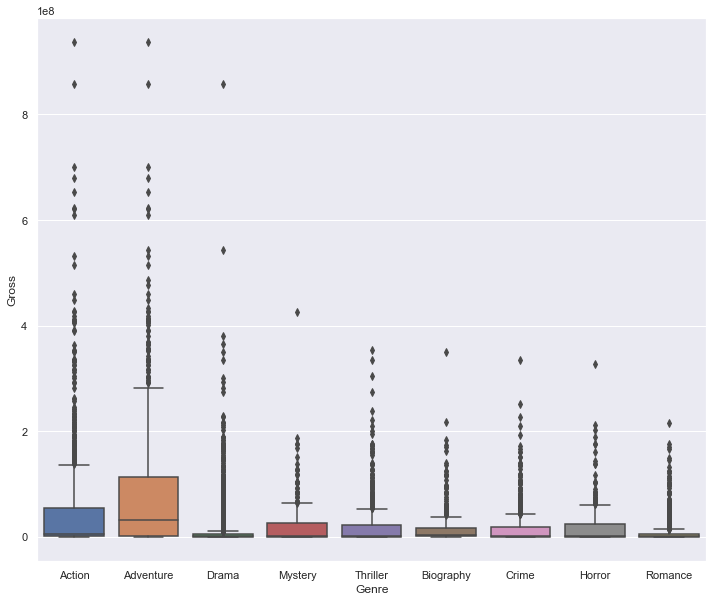

In [209]:
bar, ax=plt.subplots(figsize=(12,10))
sn.boxplot(x="Genre",y="Gross",data=df6[ind6])

The median gross has different trend for different genre films. For Adventure genre films median gross is high, and for romance and drama, films the median gross is less. Maximum gross is collected by Action and Adventure films. Drama and romace genre films have minimum gross compared other certificate films.

<AxesSubplot:xlabel='Genre'>

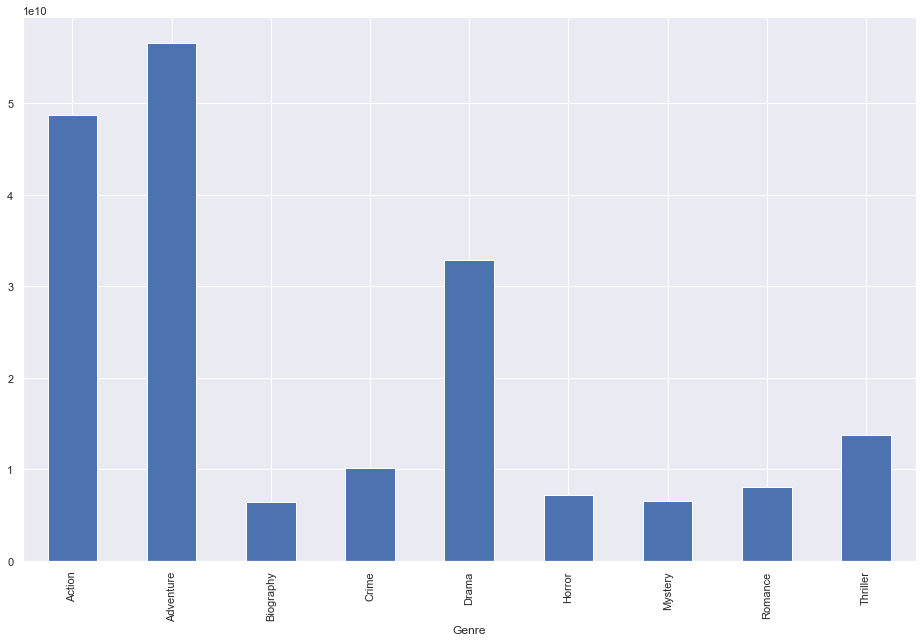

In [210]:
temp4 = df6[ind6].groupby(["Genre"]).Gross.sum()
temp4.plot(kind='bar', stacked=True)

The total gross count is high for the Adventure genre films and least for the Biography genre films.

# Year wise analysis of Votes, Gross, Length, Rating, Metascore

In [216]:
summ =(df[df["Year"]<2020].groupby('Year', sort=True).sum())

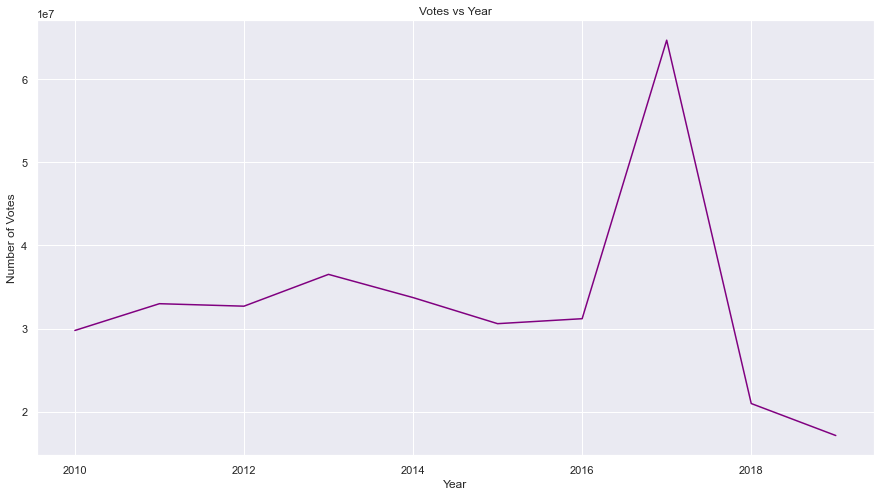

In [219]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(summ.index,
        summ['Votes'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Year",
       ylabel="Number of Votes",
       title="Votes vs Year")
plt.show()

Number of votes polled for movies has increasing trend upto 2013 and then from 2013, decreasing trend started upto 2016. In 2017 there is a sudden rise in votes and in 2018 there is sudden decrease in votes.

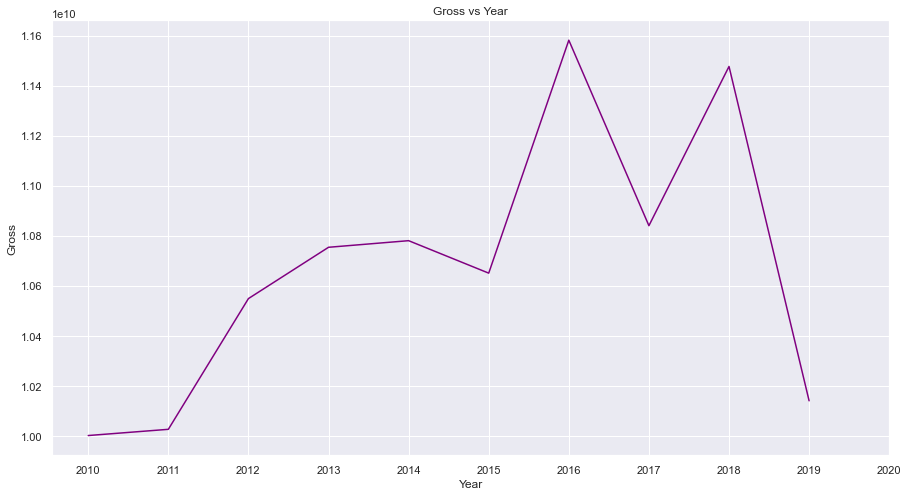

In [220]:
fig, ax = plt.subplots(figsize=(15, 8))

# Add x-axis and y-axis
ax.plot(summ.index,
        summ['Gross'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Year",
       ylabel="Gross",
       title="Gross vs Year")


plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
plt.show()

Gross collections sum has increasing trend from 2010 to 2015 and there is a sudden rise in year 2016 and sudden fall in 2017. Again sudden increase in 2018 amnd sudden decrease in 2019.

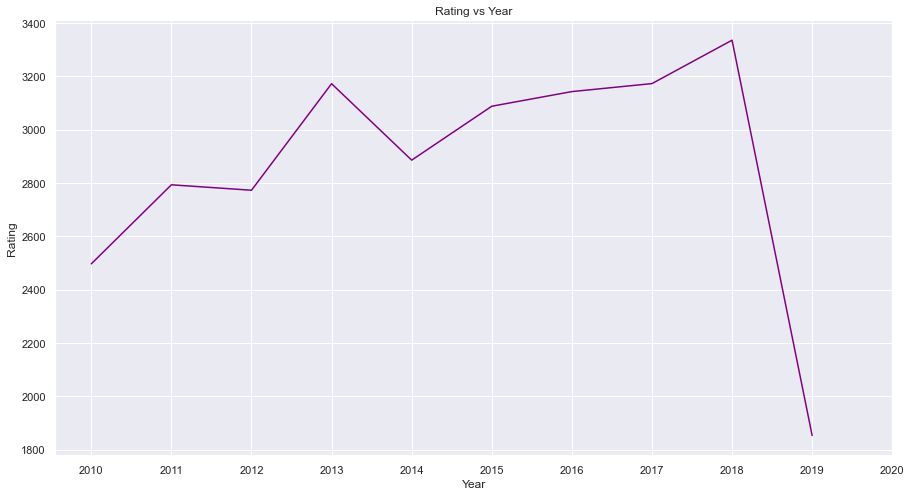

In [221]:
fig, ax = plt.subplots(figsize=(15, 8))

# Add x-axis and y-axis
ax.plot(summ.index,
        summ['Rating'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Year",
       ylabel="Rating",
       title="Rating vs Year")


plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
plt.show()

Ratings sum has increasing trend from 2010 to 2013 and a sudden fall in 2014. From 2014 to 2018, there is again increasing trend and a sudden fall in 2019

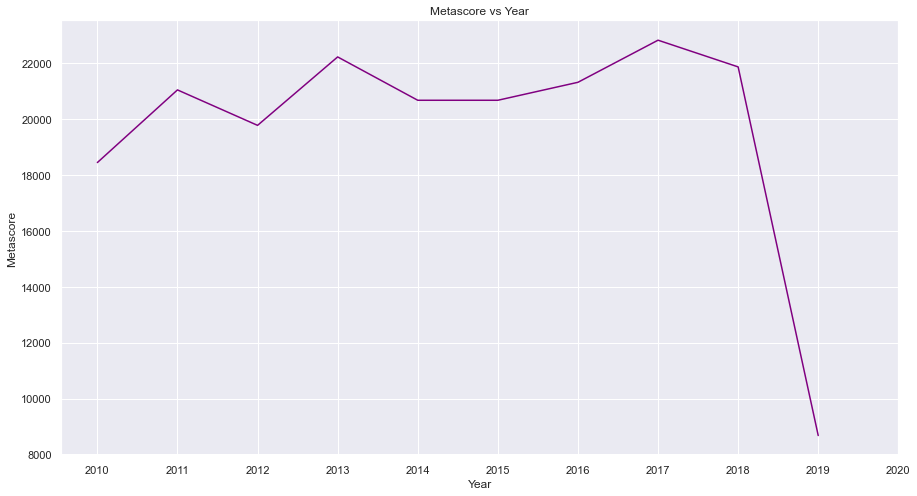

In [223]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(summ.index,
        summ['Metascore'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Year",
       ylabel="Metascore",
       title="Metascore vs Year")


plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
plt.show()

Metascore has no definite trend and there is sudden fall in the year 2019.

# Top directors with respect to number of movies released

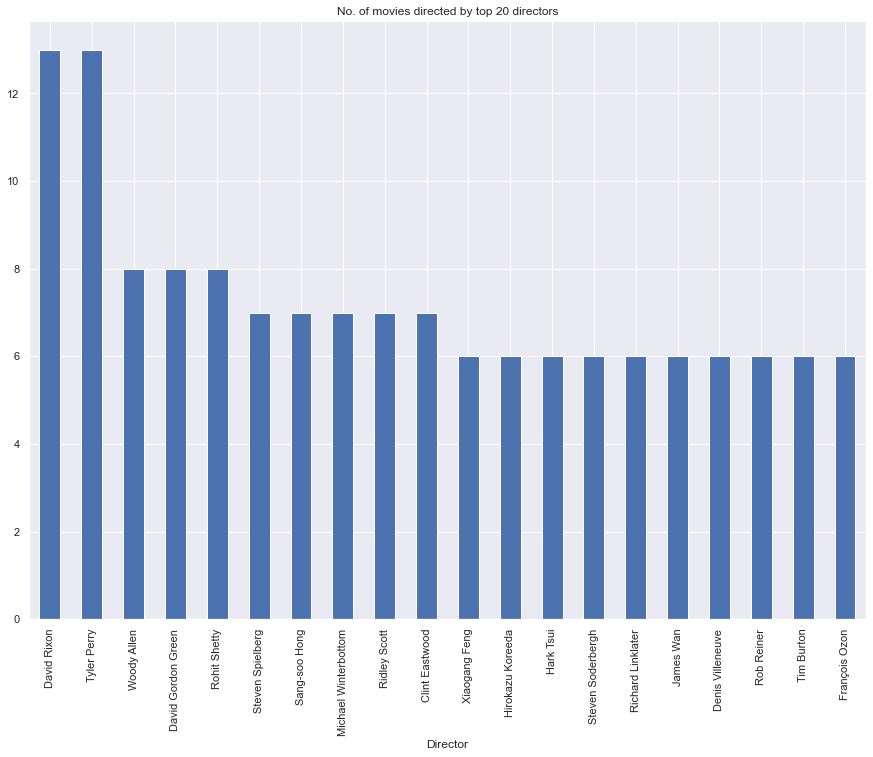

In [224]:
top_directors[:20].plot(kind='bar', figsize=(15,11), title='No. of movies directed by top 20 directors').yaxis.label.set_visible(False)

David Rixon and Tyler Perry had directed more number of films than any other director. Both of these directors has directed 13 fims in 9 years. Fracois Ozon is least directed director with 6 movies.

# Top director with respect to gross collections

In [238]:
drt = df[df["Director"].notna()]
df_temp = pd.DataFrame()
for actor,v in top_directors[:21].items():
    df_temp =df_temp.append(drt[drt['Director'].str.contains(actor)],ignore_index=True)
df_topDirectors = df_temp

In [239]:
df_topDirectors['total_revenue'] = df_topDirectors['Gross']
# take the mean of the revenue produced by all the movies directed by the director. 
df_topDirectorsRevenue = df_topDirectors.groupby(['Director']).mean()
#Extract the relavent coloumns needed for plotting
df_topDirectorsRevenue =df_topDirectorsRevenue.drop(df_topDirectorsRevenue.columns.difference(['Director','Gross']), 1)
# Sort the total_revenue coloumn in descending order
df_topDirectorsRevenue = df_topDirectorsRevenue.sort_values(by='Gross', ascending=1)

<AxesSubplot:title={'center':'Average Revenue of Movies per directors'}, ylabel='Director'>

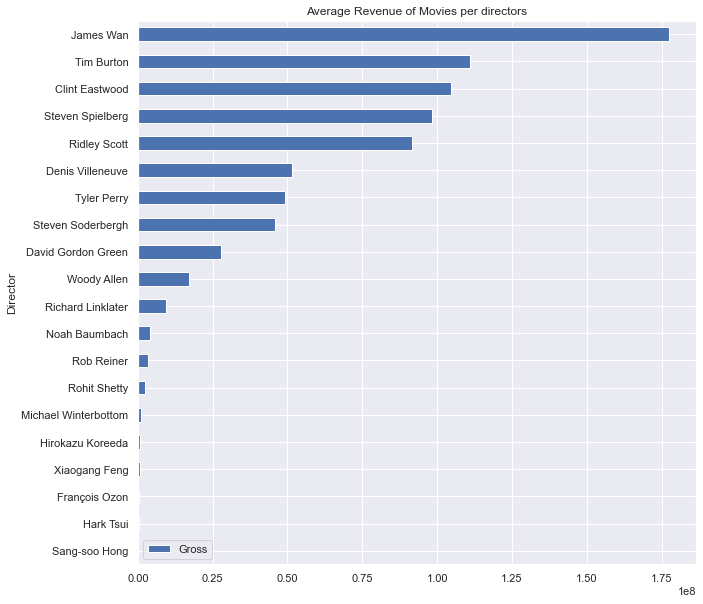

In [249]:
df_topDirectorsRevenue[0:20].plot(kind='barh', figsize=(10, 10), sort_columns='True', title='Average Revenue of Movies per directors')

James Wan movies have collected highest sum of gross between the years 2010 to 2019. Sang-soo-Hong directed movies got least sum of gross. Tim Burton, Clint Eastwood, Steven Spielberg, Ridley Scott are follows James Wan in highest gross sum collections

### Gross collections for director James Wan who has released highest number of films

In [250]:
James_wan=df_topDirectors[df_topDirectors['Director'].str.contains('James Wan')].sort_values(by='Gross', ascending=0)

In [251]:
James_wan[['Director', 'Name' ,'Gross']]

,Director,Name,Gross
115,James Wan,Fast & Furious 7,353007020.0
116,James Wan,Aquaman,335061807.0
117,James Wan,The Conjuring,137400141.0
118,James Wan,The Conjuring 2,102470008.0
119,James Wan,Insidious: Chapter 2,83586447.0
120,James Wan,Insidious,54009150.0


<AxesSubplot:title={'center':'Movie revenue directed by James Wan'}>

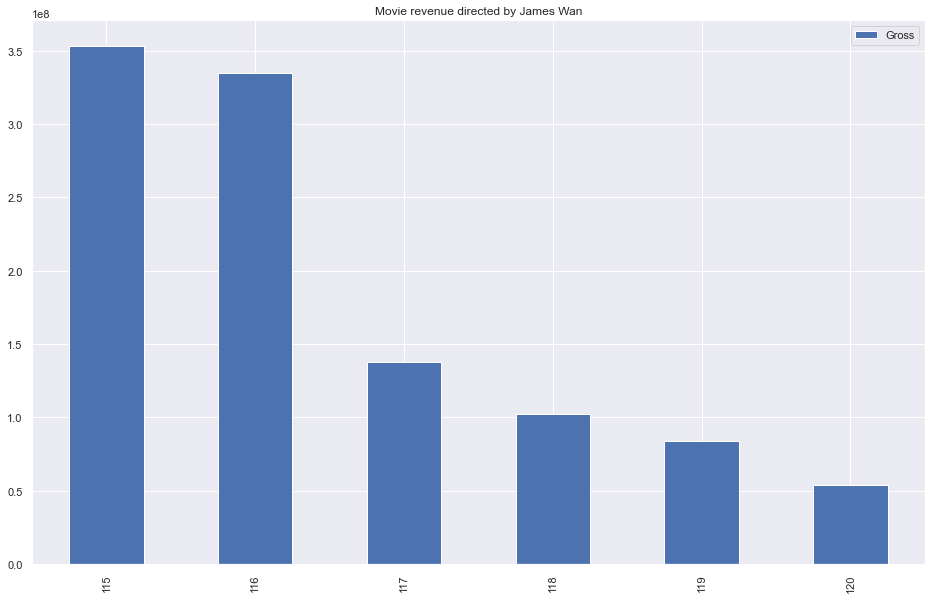

In [252]:
James_wan[['Gross']].plot(kind='bar', sort_columns='True', title='Movie revenue directed by James Wan')

Even though he has released maximum number of movies, few films got very less gross and few films got very high collections. Gross collections for remaining films is not recorded.

### Trends in Gross over Year

<AxesSubplot:xlabel='Year', ylabel='Gross'>

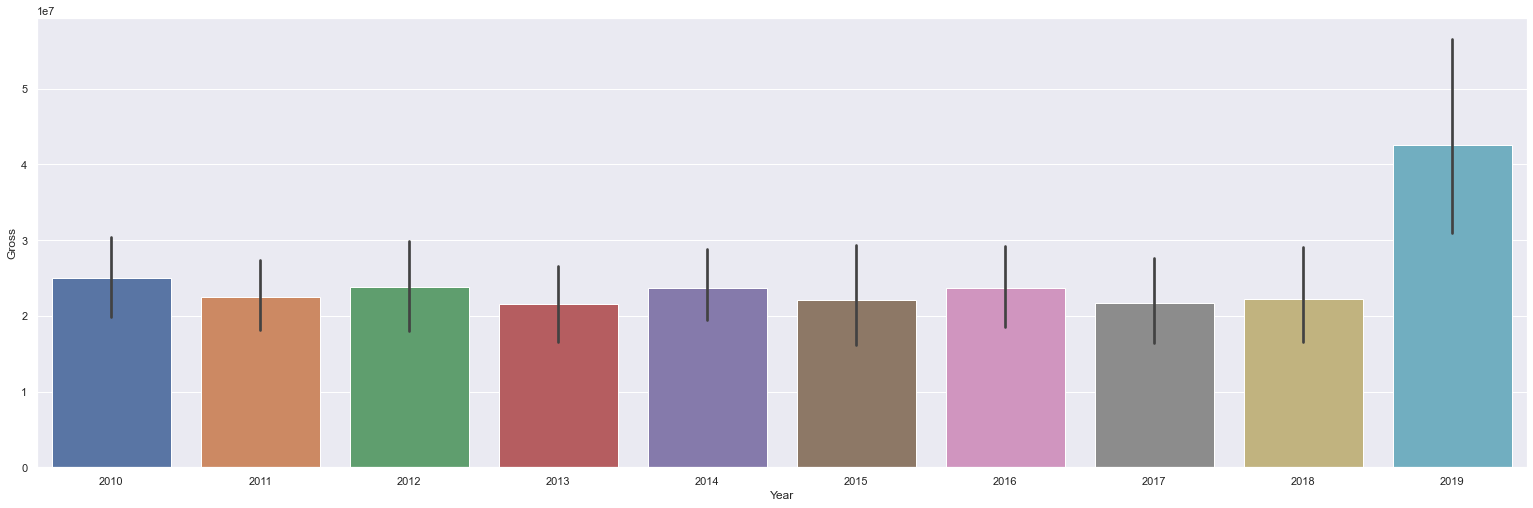

In [253]:
sn.set(font_scale=2)
sn.set(rc={'figure.figsize':(26.7,8.27)})
sn.barplot(x="Year", y="Gross", data=df[df["Year"]<2020])

There is similar trend in gross collections untill year 2018 and there is a sudden rise in year 2019

### Trends in Genre over Year

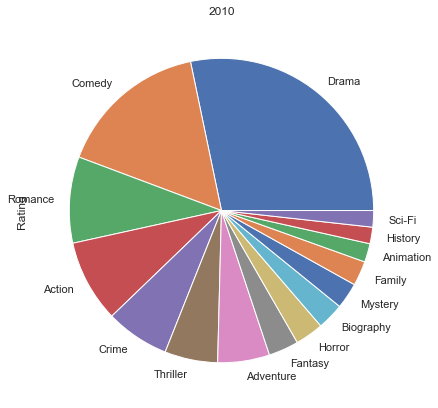

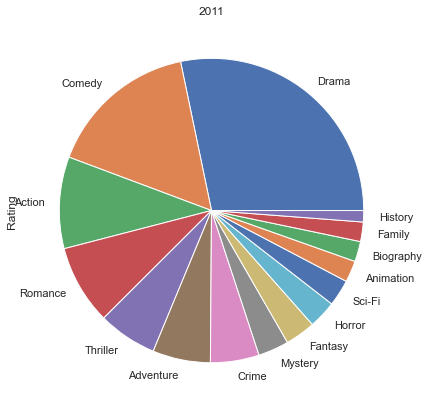

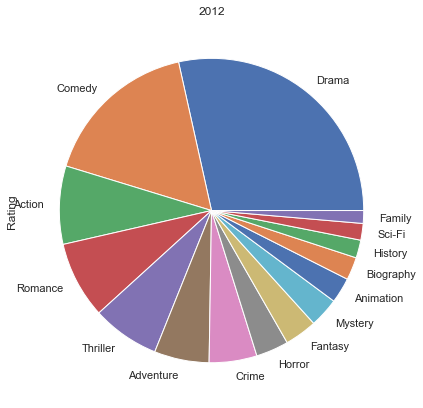

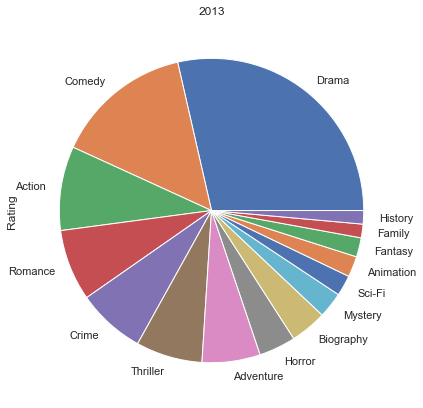

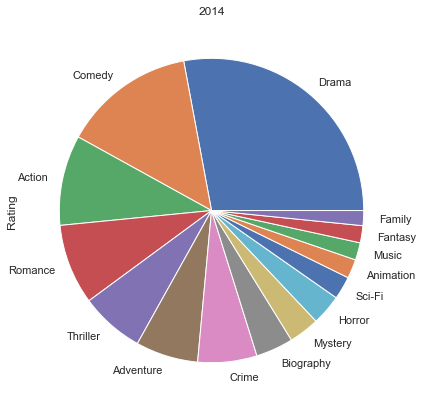

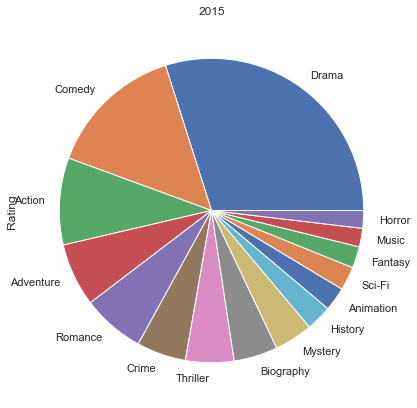

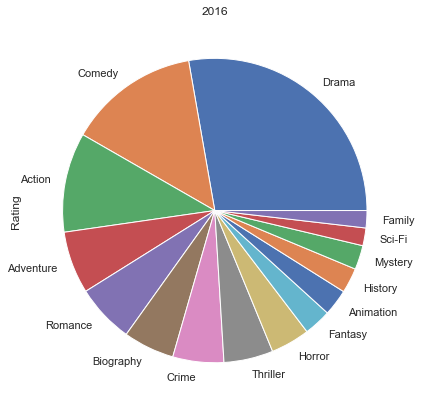

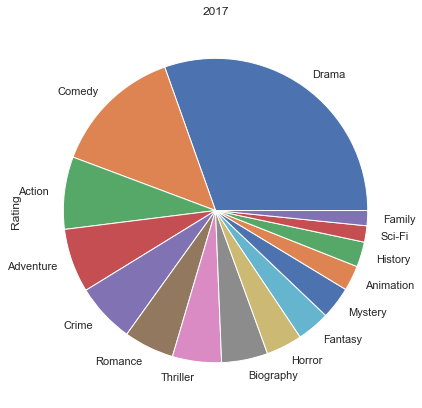

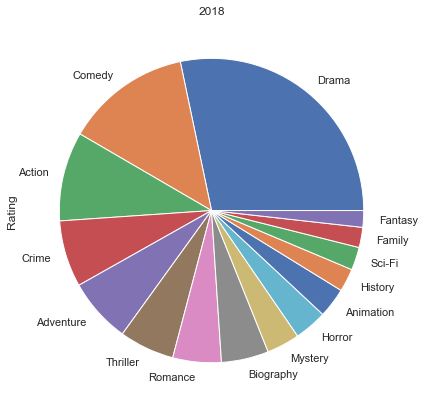

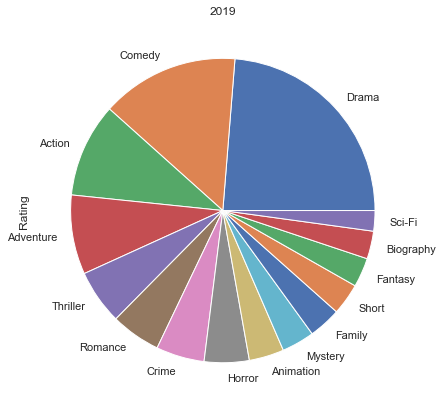

In [254]:
years = df_q1[df_q1['Year']<2020]["Year"].unique()
years.sort()
# We then loop over these subsequent years and extract the movies from that particular year and group them by 
# their popularity(sum). We then plot each using a pie chart. 
for i in years:
    genre_popularity = df_q1[df_q1['Year'] == i]
    genre_popularity = (genre_popularity.groupby('Genre')['Rating'].sum()).sort_values(ascending=False)[0:15]
    genre_popularity.plot(kind='pie', figsize=(7,7));
    plt.title(i)
    plt.show()

This picture shows the year wise sum of movies belonged to Action, Adventure, Biography, Crime, Drama, Horror, Mystery, Romance, Thriller genres. The Drama genre films are top genre films in any year. Romance genre has decreasing trend over years and Biography genre films have increasing trend over year. There is constant trend for any other genre.

# Conclusion

### Primary goal:
Web scrapping project has been successfully conducted in IMDB website.

Exploratory data analysis (EDA) has been successfully conducted on IMDB movies data.


### Observations:

There is a significant correlation between the ratings of movie with gross collections and number of votes polled, genre of the film and certificate of the film.

Based on the study, movies with a high gross tend to have better ratings than those with a low gross movies. And movies which got high votes tend to have high ratings. Also Drama, Biography, action genre films got high ratings than other genre films. U certificate films got high ratings than other certificate films.

James Wan, Tim Burton, Clint Eastwood, Steven Spielberg, Ridley Scott got  high gross sum collections than other directors